# Virtual Question Answering Team Information:
 **Ishrat Jaben Bushra**

 **Aarthi Saravanan**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Processing Original Question Annontations Files

**Preprocessing information for 20000 imges**

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud

file_path = "/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Text Pre-processing/MultipleChoice_abstract_v002_train2015_questions.json"

with open(file_path,'r') as file:
    data = json.load(file) # The json file contains a list of questions each with image_id, question, multiple_choice, question_id
#print(data)
# Convert the 'questions' part of the JSON data into a DataFrame
questions_df = pd.DataFrame(data['questions'])
print()

#print(questions_df.head()) # Display the first few rows of the DataFrame
#print(questions_df[questions_df["question_id"]==199490])

# Get the summary of questions dataframe
questions_summary = pd.DataFrame({
    "Total Questions": [questions_df.shape[0]],
    "Unique Questions": [questions_df['question'].nunique()],
    "Unique Image IDs": [questions_df['image_id'].nunique()],
    "Count of Questions per image": [questions_df['question_id'].nunique()],
    "Max Question Length (words)": [questions_df['question'].apply(lambda x: len(x.split())).max()],
    "Min Question Length (words)": [questions_df['question'].apply(lambda x: len(x.split())).min()],
    "Max MCQ options": [questions_df['multiple_choices'].apply(len).max()],
    "Min MCQ options": [questions_df['multiple_choices'].apply(len).min()]
})
print(questions_summary)
print()
# Check for missing values
missing_values = questions_df.isnull().sum()
print(missing_values)

# Identify duplicate questions within the same image
duplicate_questions_within_image = questions_df[questions_df.duplicated(subset=['question', 'image_id'], keep=False)]

# Check for duplicate questions within image and display them and verify one by giving image_id say 2191
duplicate_counts = duplicate_questions_within_image.groupby(['question', 'image_id']).size().reset_index(name="Duplicate Count")
print("\nDuplicate Questions Within the Same Image:")
print(duplicate_counts)
print()
print(questions_df[questions_df["image_id"]==2191])
print()
#  Remove one of the duplicate questions and check for questions before and after cleaning
questions_df_cleaned = questions_df.drop_duplicates(subset=['question', 'image_id'], keep='first')
print(f"Total Questions Before Cleaning: {questions_df.shape[0]}")
print(f"Total Questions After Cleaning: {questions_df_cleaned.shape[0]}")

questions_df_cleaned.to_csv("cleaned_questions_dataset.csv", index=False)
print("Cleaned dataset saved as 'cleaned_questions_dataset.csv'")



   Total Questions  Unique Questions  Unique Image IDs  \
0            60000             34841             20000   

   Count of Questions per image  Max Question Length (words)  \
0                         60000                           21   

   Min Question Length (words)  Max MCQ options  Min MCQ options  
0                            2               18               18  

image_id            0
question            0
multiple_choices    0
question_id         0
dtype: int64

Duplicate Questions Within the Same Image:
                            question  image_id  Duplicate Count
0              Are the kids running?      2191                2
1       Are the paintings identical?     14293                2
2   How many books are on the shelf?     11819                2
3      How many footballs are there?     15984                2
4        How many pillows are there?     18611                2
5              Is the deer sleeping?     10525                2
6    Is the man waiting f

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud
import ast

""" This file contains the merge operation of Questions and Annotations Json file into a CSV"""

""" Work on Question Json file"""
file_path = "/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Text Pre-processing/MultipleChoice_abstract_v002_train2015_questions.json"

with open(file_path,'r') as file:
    data = json.load(file) # The json file contains a list of questions each with image_id, question, multiple_choice, question_id
#print(data)
# Convert the 'questions' part of the JSON data into a DataFrame
questions_df = pd.DataFrame(data['questions'])
print()

#print(questions_df.head()) # Display the first few rows of the DataFrame
#print(questions_df[questions_df["question_id"]==199490])

# Get the summary of questions dataframe
questions_summary = pd.DataFrame({
    "Total Questions": [questions_df.shape[0]],
    "Unique Questions": [questions_df['question'].nunique()],
    "Unique Image IDs": [questions_df['image_id'].nunique()],
    "Count of Questions per image": [questions_df['question_id'].nunique()],
    "Max Question Length (words)": [questions_df['question'].apply(lambda x: len(x.split())).max()],
    "Min Question Length (words)": [questions_df['question'].apply(lambda x: len(x.split())).min()],
    "Max MCQ options": [questions_df['multiple_choices'].apply(len).max()],
    "Min MCQ options": [questions_df['multiple_choices'].apply(len).min()]
})
print(questions_summary)
print()
# Check for missing values
missing_values = questions_df.isnull().sum()
print(missing_values)

# Identify duplicate questions within the same image
duplicate_questions_within_image = questions_df[questions_df.duplicated(subset=['question', 'image_id'], keep=False)]

# Check for duplicate questions within image and display them and verify one by giving image_id say 2191
duplicate_counts = duplicate_questions_within_image.groupby(['question', 'image_id']).size().reset_index(name="Duplicate Count")
print("\nDuplicate Questions Within the Same Image:")
print(duplicate_counts)
print()
print(questions_df[questions_df["image_id"]==11779])
print()
#  Remove one of the duplicate questions and check for questions before and after cleaning
questions_df_cleaned = questions_df.drop_duplicates(subset=['question', 'image_id'], keep='first')
print(f"Total Questions Before Cleaning: {questions_df.shape[0]}")
print(f"Total Questions After Cleaning: {questions_df_cleaned.shape[0]}")

#questions_df_cleaned.to_csv("cleaned_questions_dataset.csv", index=False)  # Get Seperate CSV file of Questions
#print("Cleaned dataset saved as 'cleaned_questions_dataset.csv'")
""" -----------------------------------------------------------------------------------------------------------------------------------------------"""
""" Work on Annotations Json file"""

file_path = "/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Text Pre-processing/abstract_v002_train2015_annotations.json"

with open(file_path,'r') as file:
    data = json.load(file) # The json file contains a list of questions each with image_id, question, multiple_choice, question_id

annotations = data.get("annotations", [])
annotations_train = pd.DataFrame(annotations)

# Save the full dataset to a CSV file
annotations_train.to_csv("annotations_train_dataset.csv", index=False)
df = annotations_train.copy()
# Function to extract only the 'answer' part from the JSON-like structure
def extract_answers(answer_column):
    """Extracts a list of answers from the answer column."""
    try:
        # Convert string to list (if stored as string)
        answer_list = ast.literal_eval(answer_column) if isinstance(answer_column, str) else answer_column
        # Extract only the 'answer' field
        return [entry['answer'] for entry in answer_list if 'answer' in entry]
    except (SyntaxError, ValueError):
        return []  # Return empty list if conversion fails

# Apply the function to the 'answers' column
df['answers_multiple_users'] = df['answers'].apply(extract_answers)
# Drop the 'answers' column
df.drop(columns=['answers'], inplace=True)
#df.to_csv("cleaned_annotations.csv", index=False) # Get Seperate CSV file of Annotations
""" -----------------------------------------------------------------------------------------------------------------------------------------------"""

#annotations_data = pd.read_csv("annotations_train_dataset.csv")
#annotations_data.info() # No null values
#print(annotations_data.head())
#questions_data = pd.read_csv("cleaned_questions_dataset.csv")
merged_data = questions_df.merge(df, on=['question_id', 'image_id'], how='inner')
#print(len(merged_data))
merged_data.to_csv("AnnotationsQuestions_train.csv", index=False) # this file was renamed manually as "TextualProcessed_QnA_Train.csv "
print("CREATED A NEW CSV FILE!")



   Total Questions  Unique Questions  Unique Image IDs  \
0            60000             34841             20000   

   Count of Questions per image  Max Question Length (words)  \
0                         60000                           21   

   Min Question Length (words)  Max MCQ options  Min MCQ options  
0                            2               18               18  

image_id            0
question            0
multiple_choices    0
question_id         0
dtype: int64

Duplicate Questions Within the Same Image:
                            question  image_id  Duplicate Count
0              Are the kids running?      2191                2
1       Are the paintings identical?     14293                2
2   How many books are on the shelf?     11819                2
3      How many footballs are there?     15984                2
4        How many pillows are there?     18611                2
5              Is the deer sleeping?     10525                2
6    Is the man waiting f

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-4-fcdceef54ef3>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(words), x=list(counts), palette='Blues_r')


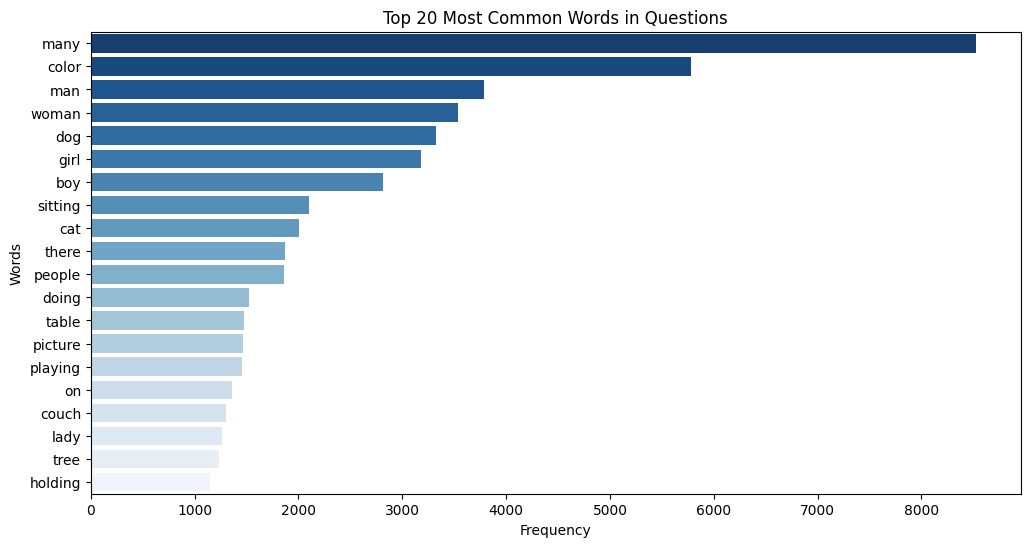

<ipython-input-4-fcdceef54ef3>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(words), x=list(counts), palette='Reds_r')


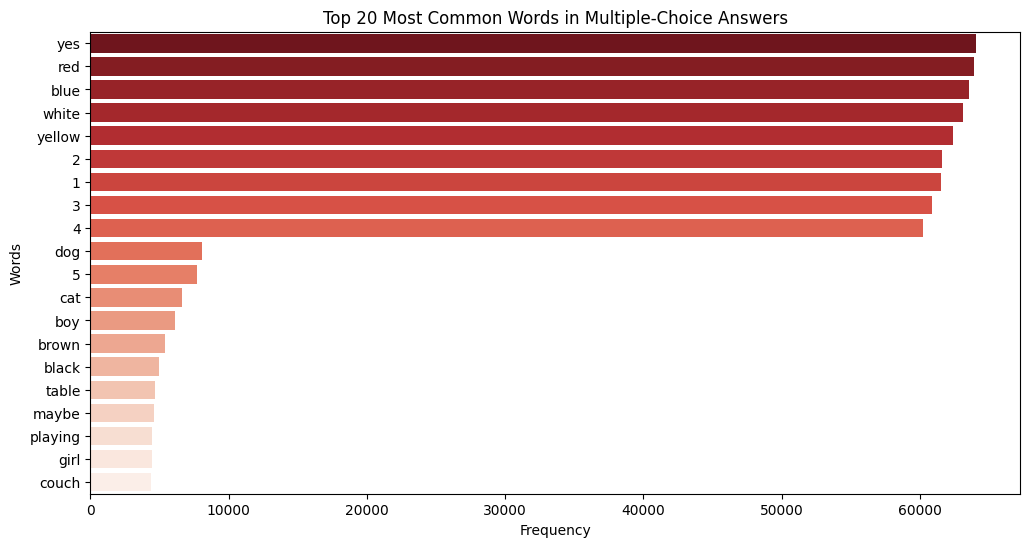

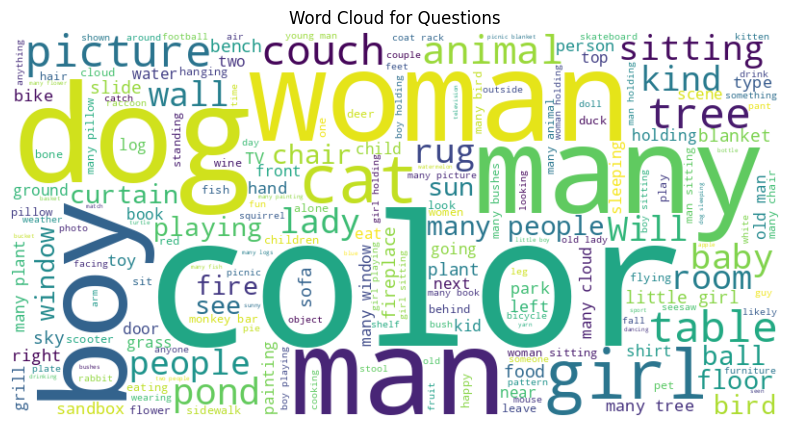

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Load dataset
file_path = "/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Text Pre-processing/cleaned_questions_dataset_TRAIN.csv"
df = pd.read_csv(file_path)

# Convert multiple_choices from string representation to list
df["multiple_choices"] = df["multiple_choices"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


# Extract most common words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def get_most_common_words(text_series, num_words=20):
    all_words = []
    for text in text_series:
        words = text.lower().split()
        words = [word.strip(string.punctuation) for word in words if word not in stop_words]
        all_words.extend(words)
    return Counter(all_words).most_common(num_words)

# Most common words in questions
common_words_questions = get_most_common_words(df["question"])

# Flatten multiple_choices lists for analysis
all_choices = [item for sublist in df["multiple_choices"] for item in sublist]
common_words_choices = get_most_common_words(pd.Series(all_choices))

# Plot word frequency
words, counts = zip(*common_words_questions)
plt.figure(figsize=(12,6))
sns.barplot(y=list(words), x=list(counts), palette='Blues_r')
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Common Words in Questions")
plt.savefig("Top 20 Most Common Words in Questions.png")
plt.show()

words, counts = zip(*common_words_choices)
plt.figure(figsize=(12,6))
sns.barplot(y=list(words), x=list(counts), palette='Reds_r')
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Common Words in Multiple-Choice Answers")
plt.show()

# Generate word cloud for questions
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df["question"]))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Questions")
plt.show()

<ipython-input-3-3afe113cb186>:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("autumn", len(first_words))  # Color mapping for different categories


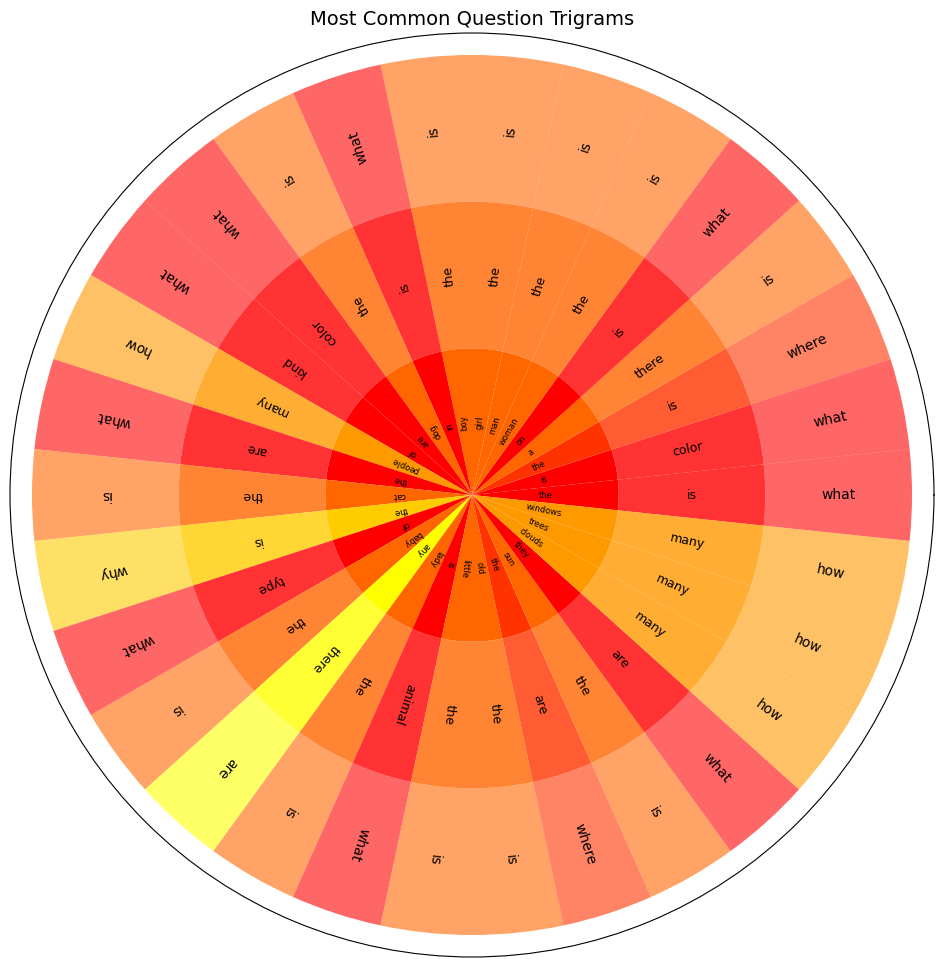

In [ ]:
# Sunburst Plot

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter

file_path = "/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Text Pre-processing/cleaned_questions_dataset_TRAIN.csv"
question_cleaned_df = pd.read_csv(file_path)

# Extract first three words of each question for hierarchy
question_cleaned_df["question_trigram"] = question_cleaned_df["question"].apply(lambda x: " ".join(x.split()[:3]).lower())

# Count occurrences of trigrams
trigram_counts = Counter(question_cleaned_df["question_trigram"])

# Create hierarchical structure (First word -> Second word -> Third word)
trigram_data = []
for trigram, count in trigram_counts.items():
    words = trigram.split()
    if len(words) == 3:
        trigram_data.append({"First Word": words[0], "Second Word": words[1], "Third Word": words[2], "Count": count})

# Convert to DataFrame
trigram_df = pd.DataFrame(trigram_data).sort_values(by="Count", ascending=False)

# Limit to top 30 trigrams for better visualization
top_trigrams = trigram_df.head(30)

# Prepare data for Sunburst
first_words = top_trigrams["First Word"].unique()
color_map = plt.cm.get_cmap("autumn", len(first_words))  # Color mapping for different categories

# Create a Sunburst-like radial chart using a polar bar chart
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': 'polar'})

# Set up the number of levels in the sunburst
num_levels = 3  # We have three levels (First Word -> Second Word -> Third Word)
width = 2 * np.pi / len(top_trigrams)  # Wedge width

# Create radial bars for each level
for i, (index, row) in enumerate(top_trigrams.iterrows()):
    # Define angular position
    theta = i * width

    # Assign color based on first-level word
    color_idx = np.where(first_words == row["First Word"])[0][0]
    color = color_map(color_idx)

    # Add bars for each level
    ax.bar(theta, 1, width=width, bottom=2, color=color, alpha=0.6)  # First level
    ax.bar(theta, 1, width=width, bottom=1, color=color, alpha=0.8)  # Second level
    ax.bar(theta, 1, width=width, bottom=0, color=color, alpha=1.0)  # Third level

    # Add text labels inside slices
    ax.text(theta, 2.5, row["First Word"], ha='center', va='center', fontsize=10, color='black', rotation=np.degrees(theta))
    ax.text(theta, 1.5, row["Second Word"], ha='center', va='center', fontsize=9, color='black', rotation=np.degrees(theta))
    ax.text(theta, 0.5, row["Third Word"], ha='center', va='center', fontsize=6, color='black', rotation=np.degrees(theta))

# Remove labels and adjust chart aesthetics
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Most Common Question Trigrams", fontsize=14)
plt.savefig("sunburst_plot.png")
# Show the plot
plt.show()

In [ ]:
# Optimized version: Efficient MiniLM embedding extraction and HDF5 storage with image_id mapping

import h5py
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from tqdm import tqdm

# Paths
csv_path = "/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/VQA feature extraction/AnnotationsQuestions_train.csv"
hdf5_path = "/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/VQA feature extraction/minilm_questionembeddings_ids.h5"  # Output file

# Load Data
df = pd.read_csv(csv_path).drop_duplicates(subset=["question_id"])  # Ensure unique question IDs

# Extract relevant columns
questions = df["question"].tolist()
question_ids = df["question_id"].astype(int).tolist()
image_ids = df["image_id"].astype(int).tolist()  # Map each question to an image

# Load MiniLM-BERT Model
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

# Generate Embeddings Efficiently
print("🔄 Generating MiniLM-BERT embeddings for questions...")
embeddings = model.encode(questions, batch_size=64, show_progress_bar=True, convert_to_numpy=True)

# Save to HDF5 efficiently
print("💾 Storing embeddings with image_id in HDF5...")
with h5py.File(hdf5_path, "w") as h5f:
    h5f.create_dataset("question_ids", data=np.array(question_ids, dtype=np.int32), compression="gzip")
    h5f.create_dataset("image_ids", data=np.array(image_ids, dtype=np.int32), compression="gzip")
    h5f.create_dataset("embeddings", data=embeddings.astype(np.float16), compression="gzip")

print(f"✅ HDF5 file with image IDs created successfully: {hdf5_path}")


**Extracting information for first 2000 image ids**

In [ ]:
# Load the CSV file
file_path = "/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/VQA feature extraction/TextualProcessed_QnA_Train.csv"
data = pd.read_csv(file_path)
data

In [ ]:
# Filter rows where image_id is between 0 and 1999 inclusive
df_2000 = df[(df['image_id'] >= 0) & (df['image_id'] <= 1999)]
df_2000

,image_id,question,multiple_choices,question_id,question_type,multiple_choice_answer,answer_type,answers_multiple_users
0,0,What color is the ladies pants?,"['1', '3', 'brown', 'wildlife', 'not having tv...",0,what color is the,tan,other,"['tan', 'tan', 'brown', 'tan', 'tan', 'color o..."
1,0,How is the equipments with bars called?,"['get warm', 'yes', 'playful', 'pug', 'red', '...",1,how,monkey bars,other,"['monkey bars', 'monkey bars', 'monkey bars', ..."
2,0,Is the bench a toy?,"['1', 'csi', 'real', 'n', 'red', 'solid', 'blo...",2,is the,no,yes/no,"['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no..."
3,1,Is the woman on the couch sporting white hair?,"['1', '3', 'idk', 'no', '2', 'red', 'skinny', ...",10,is the woman,yes,yes/no,"['yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes'..."
4,1,What is the woman doing?,"['4', 'yellow', 'no', '2', 'reading', 'holding...",11,what is the woman,sitting,other,"['sitting', 'sitting on couch', 'shooing away ..."
...,...,...,...,...,...,...,...,...
5995,1998,What is in the pond?,"['alone', 'turtles', 'lily pads', 'gone', 'red...",19981,what is in the,fish,other,"['fish', 'fish', 'koi', 'fish', 'fish', 'fish'..."
5996,1998,Is she exercising?,"['yes', 'burger and hot dog', 'blue', '4', 'by...",19982,is she,yes,yes/no,"['no', 'yes', 'no', 'yes', 'no', 'no', 'yes', ..."
5997,1999,What color is the door?,"['brown', 'on her face', 'green', 'white', 'bl...",19992,what color is the,brown,other,"['brown', 'brown', 'brown', 'brown', 'brown', ..."
5998,1999,Who is sitting on the sofa?,"['white', 'yellow', '3', 'multicolored', '1', ...",19990,who is,no one,other,"['nobody', 'nobody', 'no one', 'no one', 'nobo..."


In [ ]:
df_2000.to_csv("/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/VQA feature extraction/textualprocess_imbalance_2000.csv", index=False)

# Data Augementation for Imbalance - to handle bias

**Data augmentation code that adds one question as "how many?" people escpecially for image till 1999 if people is present and give count.**

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchvision import models
import os
from tqdm import tqdm
import pandas as pd
import random


# Load Faster R-CNN model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True).to(device)
model.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchvision import models
import os
from tqdm import tqdm
import pandas as pd

# Define relevant "how many" question templates
question_templates = {
    "person": "How many people are in the image?",
    "animal": "How many animals are present in the image?",
    "tree": "How many trees can be seen in the image?"
}

# Define the COCO classes manually
COCO_CLASSES = [
    "__background__", "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat",
    "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse",
    "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag", "tie",
    "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove",
    "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon",
    "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut",
    "cake", "chair", "couch", "potted plant", "bed", "dining table", "toilet", "TV", "laptop", "mouse",
    "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "book",
    "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"
]

# Extract only relevant COCO labels for our questions
COCO_LABELS = {
    "person": ["person"],
    "animal": ["dog", "cat", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe"],
    "tree": ["potted plant"]
}


In [ ]:
# Load dataset
csv_path = "/content/drive/MyDrive/Deep Learning/textualprocess_imbalance_2000.csv"  # Update path
df = pd.read_csv(csv_path)

# Define image folder path
image_folder = "/content/drive/MyDrive/Deep Learning/extracted_images_2000/extracted_images_2000"


In [ ]:
# Function to count objects with confidence filtering and NMS
def count_objects_batch(image_paths, batch_size=4, confidence_threshold=0.7, iou_threshold=0.5):
    images = []
    valid_paths = []

    transform = transforms.Compose([transforms.ToTensor()])

    for image_path in image_paths:
        if os.path.exists(image_path):  # Check if the image file exists
            image = Image.open(image_path).convert("RGB")
            images.append(transform(image).to(device))  # Move image to GPU
            valid_paths.append(image_path)

    if not images:
        return {path: {"person": 0, "animal": 0, "tree": 0} for path in image_paths}  # Return 0 for all categories if no valid images

    images = torch.stack(images)  # Convert list to tensor batch

    # Get predictions with mixed precision for efficiency
    with torch.no_grad(), torch.amp.autocast(device_type='cuda'):
        predictions = model(images)

    # Process predictions
    object_counts = {}
    for path, prediction in zip(valid_paths, predictions):
        boxes = prediction["boxes"]
        scores = prediction["scores"]
        labels = prediction["labels"]

        # Filter detections based on confidence threshold
        high_confidence_indices = scores > confidence_threshold
        boxes = boxes[high_confidence_indices]
        scores = scores[high_confidence_indices]
        labels = labels[high_confidence_indices]

        # Apply Non-Maximum Suppression (NMS) to remove duplicate boxes
        keep_indices = torch.ops.torchvision.nms(boxes, scores, iou_threshold)
        final_labels = labels[keep_indices]

        # Convert to class names and count occurrences
        detected_labels = [COCO_CLASSES[label.item()] for label in final_labels if label.item() < len(COCO_CLASSES)]

        # Count occurrences for relevant categories
        category_counts = {category: sum(1 for obj in detected_labels if obj in labels)
                           for category, labels in COCO_LABELS.items()}

        object_counts[path] = category_counts

    # Free GPU memory after batch processing
    del images, predictions
    torch.cuda.empty_cache()

    return object_counts

In [ ]:
# Batch size for processing
batch_size = 2
unique_image_ids = df["image_id"].unique()
image_paths = [f"{image_folder}/{image_id}.png" for image_id in unique_image_ids]

# Augment dataset with relevant count-based questions
augmented_data = []
for i in tqdm(range(0, len(image_paths), batch_size), desc="Processing Images"):
    batch_paths = image_paths[i:i + batch_size]

    # Get correct answers using object detection in batch
    object_counts = count_objects_batch(batch_paths)

    for image_path in batch_paths:
        image_id = os.path.basename(image_path).split(".")[0]  # Extract image ID

        # Determine the most relevant category with detected objects
        category, count = max(object_counts[image_path].items(), key=lambda x: x[1])  # Choose category with highest count

        if count > 0:  # Ensure a relevant question is generated
            question = question_templates[category]

            # Create augmented row
            augmented_row = {
                "image_id": image_id,
                "question": question,
                "question_type": "how many",
                "answer_type": "number",
                "multiple_choice_answer": str(count)
            }
            augmented_data.append(augmented_row)

# Convert to DataFrame and merge with original dataset
df_augmented = pd.DataFrame(augmented_data)
df_final = pd.concat([df, df_augmented], ignore_index=True)


Processing Images: 100%|██████████| 1000/1000 [03:22<00:00,  4.94it/s]


In [ ]:
df_augmented.head(50)

,image_id,question,question_type,answer_type,multiple_choice_answer
0,0,How many people are in the image?,how many,number,1
1,1,How many people are in the image?,how many,number,1
2,2,How many people are in the image?,how many,number,1
3,3,How many people are in the image?,how many,number,1
4,4,How many people are in the image?,how many,number,2
5,5,How many people are in the image?,how many,number,2
6,6,How many people are in the image?,how many,number,1
7,7,How many people are in the image?,how many,number,1
8,8,How many people are in the image?,how many,number,2
9,9,How many people are in the image?,how many,number,1


**Add question_id in the augmented data**

In [ ]:
# Find the maximum question_id for each image_id in the textual dataset
max_question_ids_per_image = df_textual.groupby("image_id")["question_id"].max().to_dict()
max_question_ids_per_image

{0: 2,
 1: 12,
 2: 22,
 3: 32,
 4: 42,
 5: 52,
 6: 62,
 7: 72,
 8: 82,
 9: 92,
 10: 102,
 11: 112,
 12: 122,
 13: 132,
 14: 142,
 15: 152,
 16: 162,
 17: 172,
 18: 182,
 19: 192,
 20: 202,
 21: 212,
 22: 222,
 23: 232,
 24: 242,
 25: 252,
 26: 262,
 27: 272,
 28: 282,
 29: 292,
 30: 302,
 31: 312,
 32: 322,
 33: 332,
 34: 342,
 35: 352,
 36: 362,
 37: 372,
 38: 382,
 39: 392,
 40: 402,
 41: 412,
 42: 422,
 43: 432,
 44: 442,
 45: 452,
 46: 462,
 47: 472,
 48: 482,
 49: 492,
 50: 502,
 51: 512,
 52: 522,
 53: 532,
 54: 542,
 55: 552,
 56: 562,
 57: 572,
 58: 582,
 59: 592,
 60: 602,
 61: 612,
 62: 622,
 63: 632,
 64: 642,
 65: 652,
 66: 662,
 67: 672,
 68: 682,
 69: 692,
 70: 702,
 71: 712,
 72: 722,
 73: 732,
 74: 742,
 75: 752,
 76: 762,
 77: 772,
 78: 782,
 79: 792,
 80: 802,
 81: 812,
 82: 822,
 83: 832,
 84: 842,
 85: 852,
 86: 862,
 87: 872,
 88: 882,
 89: 892,
 90: 902,
 91: 912,
 92: 922,
 93: 932,
 94: 942,
 95: 952,
 96: 962,
 97: 972,
 98: 982,
 99: 992,
 100: 1002,
 101: 101

In [ ]:
# Ensure each image_id starts with the correct max_question_id + 1 from the textual dataset
df_augmented["question_id"] = df_augmented["image_id"].map(lambda x: max_question_ids_per_image.get(x, -1) + 1)


In [ ]:
df_augment = df_augmented.copy()

 **add multiple_choices in the augmented data**

In [ ]:
import random

# Function to generate 17 incorrect random choices while ensuring one is the correct answer
def generate_multiple_choices(correct_answer):
    choices = set()
    choices.add(str(correct_answer))  # Ensure correct answer is included

    # Generate random incorrect answers
    while len(choices) < 18:
        rand_choice = str(random.randint(0, 20))  # Generate random numbers as incorrect answers
        if rand_choice != str(correct_answer):
            choices.add(rand_choice)

    return list(choices)

# Create the multiple_choices column
df_augment["multiple_choices"] = df_augment["multiple_choice_answer"].apply(generate_multiple_choices)



In [ ]:
df_augment.head(5).T

,0,1,2,3,4
image_id,0,1,2,3,4
question,How many people are in the image?,How many people are in the image?,How many people are in the image?,How many people are in the image?,How many people are in the image?
question_type,how many,how many,how many,how many,how many
answer_type,number,number,number,number,number
multiple_choice_answer,1,1,1,1,2
question_id,3,13,23,33,43
multiple_choices,"[13, 3, 18, 2, 14, 12, 16, 20, 0, 7, 1, 4, 10,...","[3, 13, 18, 2, 14, 15, 12, 16, 19, 0, 1, 10, 9...","[13, 18, 17, 8, 15, 12, 16, 20, 19, 0, 7, 1, 9...","[3, 13, 18, 14, 15, 8, 12, 16, 20, 19, 0, 1, 9...","[3, 13, 14, 15, 17, 12, 16, 20, 19, 0, 7, 1, 4..."


**Add answers_multiple_users to the augmented data**

In [ ]:
df_augment.head(10)

,image_id,question,question_type,answer_type,multiple_choice_answer,question_id,multiple_choices
0,0,How many people are in the image?,how many,number,1,3,"[13, 3, 18, 2, 14, 12, 16, 20, 0, 7, 1, 4, 10,..."
1,1,How many people are in the image?,how many,number,1,13,"[3, 13, 18, 2, 14, 15, 12, 16, 19, 0, 1, 10, 9..."
2,2,How many people are in the image?,how many,number,1,23,"[13, 18, 17, 8, 15, 12, 16, 20, 19, 0, 7, 1, 9..."
3,3,How many people are in the image?,how many,number,1,33,"[3, 13, 18, 14, 15, 8, 12, 16, 20, 19, 0, 1, 9..."
4,4,How many people are in the image?,how many,number,2,43,"[3, 13, 14, 15, 17, 12, 16, 20, 19, 0, 7, 1, 4..."
5,5,How many people are in the image?,how many,number,2,53,"[3, 18, 17, 15, 8, 12, 16, 19, 20, 0, 10, 9, 4..."
6,6,How many people are in the image?,how many,number,1,63,"[3, 13, 18, 14, 15, 8, 12, 16, 20, 0, 9, 7, 1,..."
7,7,How many people are in the image?,how many,number,1,73,"[13, 3, 17, 8, 14, 15, 19, 20, 16, 0, 1, 7, 9,..."
8,8,How many people are in the image?,how many,number,2,83,"[13, 3, 18, 15, 8, 12, 19, 20, 0, 1, 7, 4, 10,..."
9,9,How many people are in the image?,how many,number,1,93,"[13, 18, 14, 15, 8, 19, 20, 16, 0, 10, 1, 9, 7..."


In [ ]:
# Function to generate answers from multiple users
def generate_answers_multiple_users(correct_answer):
    user_answers = [str(correct_answer)]  # Include the correct answer

    # Generate additional answers, simulating different user responses
    for _ in range(9):  # Collect answers from 9 additional users
        if random.random() > 0.7:  # 30% chance of an incorrect answer
            user_answers.append(str(random.randint(0, 20)))  # Random incorrect answer
        else:
            user_answers.append(str(correct_answer))  # Correct answer

    return user_answers

# Create the answers_multiple_users column
df_augment["answers_multiple_users"] = df_augmented["multiple_choice_answer"].apply(generate_answers_multiple_users)



In [ ]:
df_augment.head(10)

,image_id,question,question_type,answer_type,multiple_choice_answer,question_id,multiple_choices,answers_multiple_users
0,0,How many people are in the image?,how many,number,1,3,"[13, 3, 18, 2, 14, 12, 16, 20, 0, 7, 1, 4, 10,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
1,1,How many people are in the image?,how many,number,1,13,"[3, 13, 18, 2, 14, 15, 12, 16, 19, 0, 1, 10, 9...","[1, 1, 20, 1, 1, 1, 16, 1, 20, 1]"
2,2,How many people are in the image?,how many,number,1,23,"[13, 18, 17, 8, 15, 12, 16, 20, 19, 0, 7, 1, 9...","[1, 1, 9, 2, 1, 1, 1, 1, 1, 1]"
3,3,How many people are in the image?,how many,number,1,33,"[3, 13, 18, 14, 15, 8, 12, 16, 20, 19, 0, 1, 9...","[1, 1, 1, 13, 18, 17, 1, 1, 18, 4]"
4,4,How many people are in the image?,how many,number,2,43,"[3, 13, 14, 15, 17, 12, 16, 20, 19, 0, 7, 1, 4...","[2, 4, 2, 14, 2, 10, 20, 2, 2, 10]"
5,5,How many people are in the image?,how many,number,2,53,"[3, 18, 17, 15, 8, 12, 16, 19, 20, 0, 10, 9, 4...","[2, 2, 19, 2, 2, 2, 2, 2, 2, 2]"
6,6,How many people are in the image?,how many,number,1,63,"[3, 13, 18, 14, 15, 8, 12, 16, 20, 0, 9, 7, 1,...","[1, 1, 1, 19, 1, 1, 0, 0, 18, 1]"
7,7,How many people are in the image?,how many,number,1,73,"[13, 3, 17, 8, 14, 15, 19, 20, 16, 0, 1, 7, 9,...","[1, 8, 19, 1, 1, 15, 8, 1, 1, 1]"
8,8,How many people are in the image?,how many,number,2,83,"[13, 3, 18, 15, 8, 12, 19, 20, 0, 1, 7, 4, 10,...","[2, 2, 17, 11, 13, 2, 20, 2, 2, 2]"
9,9,How many people are in the image?,how many,number,1,93,"[13, 18, 14, 15, 8, 19, 20, 16, 0, 10, 1, 9, 7...","[1, 1, 1, 0, 1, 19, 10, 1, 1, 1]"


In [ ]:
df_augment.to_csv("/content/drive/MyDrive/Deep Learning/augmented_dataset2000_int.csv", index=False)

In [ ]:
# Convert all values in multiple_choices and answers_multiple_users columns to string format
df_augment["multiple_choices"] = df_augment["multiple_choices"].apply(lambda x: [str(i) for i in x])
df_augment["answers_multiple_users"] = df_augment["answers_multiple_users"].apply(lambda x: [str(i) for i in x])

df_augment.to_csv("/content/drive/MyDrive/Deep Learning/augmented_dataset2000.csv", index=False)


**Merge the above dataset with actual dataset to get balanced_dataset.csv**

In [ ]:
import pandas as pd

# File paths
df1_path = '/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Imbalanced dataset/textualprocess_imbalance_2000.csv'  # Replace with actual path
df2_path = '/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Imbalanced dataset/augmented_dataset2000.csv'  # Replace with actual path

# Load datasets
df1 = pd.read_csv(df1_path)
df2 = pd.read_csv(df2_path)

# Find the maximum question_id for each image_id in df1
max_question_ids = df1.groupby('image_id')['question_id'].max().to_dict()

# Function to assign new question_id
new_rows = []
for _, row in df2.iterrows():
    image_id = row['image_id']
    question_text = row['question']

    # Get the next question_id
    if image_id in max_question_ids:
        max_question_ids[image_id] += 1
    else:
        max_question_ids[image_id] = 0  # Start from 0 if not present in df1

    new_row = {
        'image_id': image_id,
        'question_id': max_question_ids[image_id],
        'question': question_text,
        'question_type': row.get('question_type', None),
        'multiple_choice_answer': row.get('multiple_choice_answer', None),
        'answer_type': row.get('answer_type', None),
        'answers_multiple_users': row.get('answers_multiple_users', None),
        'multiple_choices': row.get('multiple_choices', None)
    }

    new_rows.append(new_row)

# Convert new rows to DataFrame
df_new = pd.DataFrame(new_rows)

# Merge both datasets
df_merged = pd.concat([df1, df_new], ignore_index=True)

# Save the merged dataset
df_merged.to_csv('balanced_dataset.csv', index=False)



# Extracting Image Feature Using ResNet50 for first 2000 image ids

In [ ]:
import os
# Filter for image files (e.g., .jpg, .png, .jpeg)
image_folderc = "/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Image Pre-Process and Feature Extraction/train_image_renamed"
image_files = sorted(os.listdir(image_folderc))
image_files = [f for f in image_files if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

# Get the count of image files
image_count = len(image_files)

# Print the result
print(f"There are {image_count} images in the folder.")

There are 20000 images in the folder.


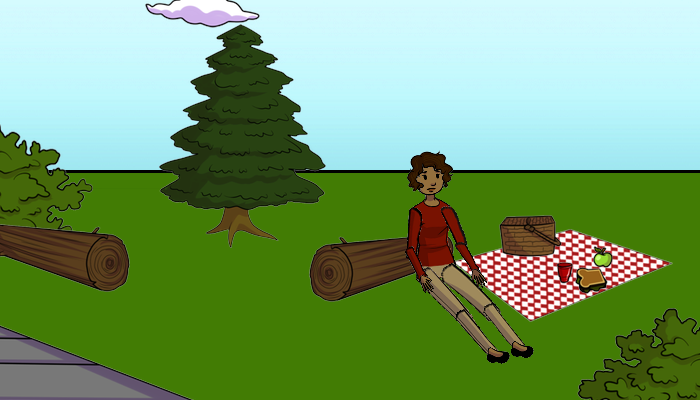

In [ ]:
from PIL import Image

# Open and display the image
img = Image.open(r"/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Image Pre-Process and Feature Extraction/train_image_renamed/1329.png")
display(img)

In [ ]:
import os

# Specify the folder path
folder_path = "/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/VQA feature extraction/extracted_images_2000/extracted_images_2000"
# Count PNG files
png_files = [f for f in os.listdir(folder_path) if f.lower().endswith('.png')]

# Print the count
print(f"Number of .png files in '{folder_path}': {len(png_files)}")

Number of .png files in '/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/VQA feature extraction/extracted_images_2000/extracted_images_2000': 2000


In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import numpy as np
import os
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torch.cuda.amp import autocast  # ✅ Enable Mixed Precision

# ✅ Load ResNet50 (Places365) Model with GPU Optimized Weights
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(pretrained=False)

checkpoint = torch.hub.load_state_dict_from_url(
    "http://places2.csail.mit.edu/models_places365/resnet50_places365.pth.tar",
    map_location=device  # ✅ Load weights directly to GPU
)

state_dict = {k: v for k, v in checkpoint["state_dict"].items() if not k.startswith("fc.")}
model.load_state_dict(state_dict, strict=False)

feature_extractor = nn.Sequential(*(list(model.children())[:-1])).to(device)
feature_extractor.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "http://places2.csail.mit.edu/models_places365/resnet50_places365.pth.tar" to /root/.cache/torch/hub/checkpoints/resnet50_places365.pth.tar
100%|██████████| 92.8M/92.8M [00:06<00:00, 15.3MB/s]


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [ ]:


# ✅ Use Mixed Precision to Speed Up Computation
torch.backends.cudnn.benchmark = True  # ✅ Optimizes GPU kernel selection

# ✅ Image Preprocessing Pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# ✅ Load Image Filenames
valid_extensions = {".jpg", ".jpeg", ".png"}
image_folder = "/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/VQA feature extraction/extracted_images_2000/extracted_images_2000"

image_list = [
    f for f in os.listdir(image_folder)
    if os.path.splitext(f)[1].lower() in valid_extensions
]




In [ ]:
def extract_numeric_id(filename):
    num_part = ''.join(filter(str.isdigit, filename))
    return int(num_part) if num_part.isdigit() else float('inf')

image_list = sorted(image_list, key=extract_numeric_id)
image_paths = [os.path.join(image_folder, img_name) for img_name in image_list]

# ✅ Custom Dataset Class
class ImageDataset(Dataset):
    def __init__(self, image_paths, transform):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        try:
            img = Image.open(image_path).convert("RGB")
            img = self.transform(img)
            image_id = extract_numeric_id(os.path.basename(image_path))
            return img, image_id
        except Exception as e:
            print(f"🚨 Skipping corrupted image: {image_path} (Error: {e})")
            return None  # Skip corrupted image

# ✅ Use DataLoader with Collate Function
def collate_fn(batch):
    batch = [b for b in batch if b is not None]
    if len(batch) == 0:
        return None, None
    images, ids = zip(*batch)
    return torch.stack(images), torch.tensor(ids)

batch_size = 4
dataset = ImageDataset(image_paths, transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True, collate_fn=collate_fn)

# ✅ Extract and Store Features Using Mixed Precision
all_image_ids = []
all_image_features = []

for batch_images, batch_image_ids in dataloader:
    if batch_images is None:
        continue  # Skip empty batches

    batch_images = batch_images.to(device, non_blocking=True)

    with torch.no_grad():
        with autocast():  # ✅ Faster Computation with Mixed Precision
            batch_features = feature_extractor(batch_images)

    batch_features = batch_features.view(batch_features.shape[0], -1).cpu().numpy()
    all_image_ids.extend(batch_image_ids.cpu().numpy())
    all_image_features.append(batch_features)

# ✅ Save Extracted Features
if all_image_ids:
    np.save('/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/VQA feature extraction/image_ids_2000.npy', np.array(all_image_ids, dtype=np.int32))
    np.save('/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/VQA feature extraction/image_features_2000.npy', np.vstack(all_image_features))

    print(f"✅ Image Features Saved: {np.vstack(all_image_features).shape}")
    print(f"✅ Image IDs Saved: {np.array(all_image_ids, dtype=np.int32).shape}")
else:
    print("🚨 No valid image features extracted. Check dataset!")

torch.save(feature_extractor.state_dict(), "/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/VQA feature extraction/resnet50_places365_feature_extractor_2000.pth")
print("✅ ResNet50 (Places365) Model Saved Successfully!")

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
<ipython-input-52-2c25af70650e>:51: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # ✅ Faster Computation with Mixed Precision
/usr/local/lib/python3.11/dist-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


✅ Image Features Saved: (2000, 2048)
✅ Image IDs Saved: (2000,)
✅ ResNet50 (Places365) Model Saved Successfully!


# Extracting Question Feature Using MiniLm Bert for Images ids for  first 2000

In [ ]:
import h5py
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from tqdm import tqdm

In [ ]:


# Paths
#csv_path = "/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/VQA feature extraction/TextualProcessed_QnA_Train.csv"
csv_path = "/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Imbalanced dataset/augmented process/balanced_dataset.csv"
hdf5_path = "/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Imbalanced dataset/augmented process/balanced_questionembeddings_ids.h5"  # Output file

# Load Data
#df = pd.read_csv(csv_path)
#df = df.drop_duplicates(subset=["question_id"])  # Ensure unique question IDs
questions = df["question"].tolist()
question_ids = df["question_id"].astype(int).tolist()
image_ids = df["image_id"].astype(int).tolist()  # Add image_id

# Load MiniLM-BERT Model
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

# Generate Embeddings
print("🔄 Generating MiniLM-BERT embeddings for questions...")
embeddings = model.encode(questions, batch_size=32, show_progress_bar=True, convert_to_numpy=True)

# Save to HDF5 with Image ID
print("💾 Storing embeddings in HDF5 with image IDs...")
with h5py.File(hdf5_path, "w") as h5f:
    h5f.create_dataset("image_ids", data=np.array(image_ids, dtype=np.int32))  # Store Image IDs
    h5f.create_dataset("question_ids", data=np.array(question_ids, dtype=np.int32))  # Store Question IDs
    h5f.create_dataset("embeddings", data=embeddings.astype(np.float16), compression="gzip")  # Store Embeddings

print(f"✅ HDF5 file created successfully: {hdf5_path}")


🔄 Generating MiniLM-BERT embeddings for questions...


Batches:   0%|          | 0/241 [00:00<?, ?it/s]

💾 Storing embeddings in HDF5 with image IDs...
✅ HDF5 file created successfully: /content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Imbalanced dataset/augmented process/balanced_questionembeddings_ids.h5


In [ ]:
# Verify Storage
with h5py.File(hdf5_path, "r") as h5f:
    print("✅ Stored Image IDs Shape:", h5f["image_ids"].shape)
    print("✅ Stored Question IDs Shape:", h5f["question_ids"].shape)
    print("✅ Stored Embeddings Shape:", h5f["embeddings"].shape)

✅ Stored Image IDs Shape: (7689,)
✅ Stored Question IDs Shape: (7689,)
✅ Stored Embeddings Shape: (7689, 384)


In [ ]:
# Function to verify a given question_id by decoding the corresponding question
def verify_question_by_id(question_id, hdf5_path, df):
    """Retrieve and verify the original question from HDF5 using question ID."""
    with h5py.File(hdf5_path, "r") as h5f:
        question_ids = h5f["question_ids"][:]  # Load all stored question IDs
        idx = np.where(question_ids == question_id)[0]  # Find matching index

        if len(idx) == 0:
            return f"⚠️ Question ID {question_id} not found in HDF5."

        # Retrieve the question from the CSV
        matching_question = df[df["question_id"] == question_id]["question"].values
        return matching_question[0] if len(matching_question) > 0 else f"⚠️ Question ID {question_id} not found in CSV."


In [ ]:
# Example: Verify a specific question ID
input_question_id = 3  # Replace with any question_id you want to check
verified_question = verify_question_by_id(input_question_id, hdf5_path, df)

# Display the result
verified_question

'How many people are in the image?'

In [ ]:
with h5py.File(hdf5_path, "r") as h5f:
    keys = list(h5f.keys())
keys

['embeddings', 'image_ids', 'question_ids']

# Extracting Yolo Features for Images ids for first 2000

In [ ]:
pip install -q ultralytics

In [ ]:
import os
import torch
import torch.nn.functional as F
import numpy as np
import h5py
import cv2
from ultralytics import YOLO
from tqdm import tqdm  # Progress bar

# 🔥 Set CPU Mode (Disable GPU to avoid NCCL issues)
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
device = torch.device("cpu")

# 📂 Paths
hdf5_input_path = "/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Imbalanced dataset/augmented process/balanced_questionembeddings_ids.h5"
hdf5_output_path = "/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Imbalanced dataset/augmented process/yolo_question_features.h5"
image_folder = "/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/VQA feature extraction/extracted_images_2000/extracted_images_2000"

# 🔥 Load YOLOv8 for Feature Extraction
yolo_model = YOLO("yolov8n.pt").model.to(device).eval()

# Default feature vector for missing images (1024-dimensional zero vector)
DEFAULT_YOLO_FEATURE = np.zeros((1024,), dtype=np.float32)

# 📌 Function to Extract YOLO Features in Batch Mode
def extract_yolo_features_batch(image_paths):
    """
    Batch processes multiple images for YOLO feature extraction.
    Returns a list of extracted features.
    """
    batch_images = []
    valid_indices = []

    for idx, img_path in enumerate(image_paths):
        img = cv2.imread(img_path)
        if img is None:
            continue  # Skip loading invalid images

        img = cv2.resize(img, (640, 640)) / 255.0  # Normalize
        img_tensor = torch.tensor(img, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)
        batch_images.append(img_tensor)
        valid_indices.append(idx)

    if not batch_images:
        return [DEFAULT_YOLO_FEATURE] * len(image_paths)  # Return default vector if all images fail

    # Convert batch to tensor & move to device
    batch_tensor = torch.cat(batch_images).to(device)

    # Extract YOLO features (Efficient Backbone Feature Extraction)
    with torch.no_grad():
        yolo_features = yolo_model.model[0](batch_tensor)

    # Reduce feature map (Batch, 16, 320, 320) → (Batch, 16, 8, 8)
    yolo_features = F.adaptive_avg_pool2d(yolo_features, (8, 8))

    # Flatten features for each image
    yolo_features_list = [yolo_features[i].view(-1).cpu().numpy() for i in range(len(batch_images))]

    # Fill missing images with default vectors
    final_features = [DEFAULT_YOLO_FEATURE] * len(image_paths)
    for i, idx in enumerate(valid_indices):
        final_features[idx] = yolo_features_list[i]

    return final_features

# 📌 Load Question-Image Mapping from HDF5
with h5py.File(hdf5_input_path, "r") as h5f:
    image_ids = h5f["image_ids"][:]  # (num_questions,)
    question_ids = h5f["question_ids"][:]  # (num_questions,)

# ✅ Create Image-to-Question Mapping (Efficient)
image_to_questions = {}
for idx in range(len(image_ids)):
    img_id = image_ids[idx]
    image_to_questions.setdefault(img_id, []).append(question_ids[idx])

# 📂 Store Image Features with Question IDs in HDF5
batch_size = 32  # Number of images processed at once
image_id_list = sorted(set(image_ids))  # Unique images

with h5py.File(hdf5_output_path, "w") as h5f_out:
    # Memory Efficient HDF5 Storage
    num_entries = sum(len(q_list) for q_list in image_to_questions.values())
    image_features_dset = h5f_out.create_dataset("image_features", (num_entries, 1024), dtype=np.float32, compression="gzip")
    image_ids_dset = h5f_out.create_dataset("image_ids", (num_entries,), dtype=np.int32)
    question_ids_dset = h5f_out.create_dataset("question_ids", (num_entries,), dtype=np.int32)

    index = 0  # Track dataset writing index

    # 🔄 Process Images in Batches with Progress Bar
    for i in tqdm(range(0, len(image_id_list), batch_size), desc="Processing Image Batches"):
        batch_ids = image_id_list[i:i+batch_size]
        batch_paths = [f"{image_folder}/{img_id}.png" for img_id in batch_ids]

        # Extract YOLO features in batch mode
        batch_features = extract_yolo_features_batch(batch_paths)

        # Store in HDF5 dataset efficiently
        for img_idx, img_id in enumerate(batch_ids):
            img_features = batch_features[img_idx]

            for question_id in image_to_questions[img_id]:
                # Store image & question features
                image_features_dset[index] = img_features
                image_ids_dset[index] = int(img_id)  # Ensure integer image ID storage
                question_ids_dset[index] = int(question_id)
                index += 1

print(f"✅ YOLO Image Features & Question IDs Successfully Stored in HDF5: {hdf5_output_path}")


Processing Image Batches: 100%|██████████| 63/63 [02:08<00:00,  2.04s/it]

✅ YOLO Image Features & Question IDs Successfully Stored in HDF5: /content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Imbalanced dataset/augmented process/yolo_question_features.h5


In [ ]:
import h5py

# Open the HDF5 file and check its contents
hdf5_output_path = "/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Imbalanced dataset/augmented process/yolo_question_features.h5"

with h5py.File(hdf5_output_path, "r") as h5f:
    # List all dataset keys in the file
    keys = list(h5f.keys())
    print("📂 HDF5 File Keys:", keys)

    # Get shapes of each dataset
    shapes = {key: h5f[key].shape for key in keys}
    print("📏 Dataset Shapes:")
    for key, shape in shapes.items():
        print(f"  🔹 {key}: {shape}")


📂 HDF5 File Keys: ['image_features', 'image_ids', 'question_ids']
📏 Dataset Shapes:
  🔹 image_features: (7689, 1024)
  🔹 image_ids: (7689,)
  🔹 question_ids: (7689,)


# Processing Captions for the images

In [ ]:
import torch
import os
import pandas as pd
from tqdm import tqdm
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)

if device == "cuda":
    model.half()  # Use half-precision for speed on GPU

model.eval()  # Put model in evaluation mode


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-0

In [ ]:
# Define parameters
temperature = 1.0
top_k = 50
top_p = 0.9
typical_p = 0.95
repetition_penalty = 1.2
num_captions = 10  # Generate 5 captions per image

# Define paths
image_folder = "/content/drive/MyDrive/Deep Learning/extracted_images_2000/extracted_images_2000"  # Change this to your actual image directory
output_csv = "/content/drive/MyDrive/Deep Learning/generated_captions.csv"


In [ ]:
# Get list of image files
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
image_files.sort()  # Ensure consistent ordering

In [ ]:
# ✅ Check if images are found
if len(image_files) == 0:
    print("❌ No images found in the directory. Please check the path.")
    exit()

print(f" Total images found: {len(image_files)}")

 Total images found: 2000


In [ ]:
# ✅ Initialize Data Storage
batch_size = 2
captions_data = []

# ✅ Process Images in Batches
for i in tqdm(range(0, len(image_files), batch_size), desc="Processing Batches", total=(len(image_files) + batch_size - 1) // batch_size):
    batch_files = image_files[i: i + batch_size]  # Get a batch of images
    batch_images = []

    # ✅ Load images into memory-efficient format
    for img_name in batch_files:
        img_path = os.path.join(image_folder, img_name)
        try:
            image = Image.open(img_path).convert("RGB")
            batch_images.append(image)
        except Exception as e:
            print(f"⚠️ Skipping corrupted image: {img_name} (Error: {e})")
            continue  # Skip corrupt or unreadable images

    # ✅ Skip empty batches
    if not batch_images:
        continue

    # ✅ Process batch with `torch.no_grad()` to reduce memory usage
    with torch.no_grad():
        inputs = processor(images=batch_images, return_tensors="pt", padding=True).to(device)

        # ✅ Generate captions
        output = model.generate(
            **inputs,
            do_sample=True,
            max_length=50,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            typical_p=typical_p,
            repetition_penalty=repetition_penalty,
            num_return_sequences=num_captions  # ✅ Generates 6 captions at once per image
        )

        # ✅ Convert generated tokens into text captions
        generated_captions = processor.batch_decode(output, skip_special_tokens=True)

        # ✅ Reshape captions correctly for each image
        reshaped_captions = [generated_captions[i * num_captions: (i + 1) * num_captions] for i in range(len(batch_images))]

        # ✅ Store captions in DataFrame-compatible format
        for img_name, captions in zip(batch_files, reshaped_captions):
            captions_data.append([img_name] + captions)

    # ✅ Free up memory
    del inputs, output, batch_images
    torch.cuda.empty_cache()  # ✅ Clear GPU memory


Processing Batches: 100%|██████████| 1000/1000 [10:34<00:00,  1.58it/s]


In [ ]:
# ✅ Convert to DataFrame & Save to CSV Efficiently
df = pd.DataFrame(captions_data, columns=["image_id", "caption1", "caption2", "caption3", "caption4", "caption5",
                                          "caption6", "caption7", "caption8", "caption9", "caption10"])
df["image_id"] = df["image_id"].str.replace(".png", "", regex=False)
output_csv = "/content/drive/MyDrive/Deep Learning/generated_10_captions.csv"

df.to_csv(output_csv, index=False)


In [ ]:
import pandas as pd
csv_path = "/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/VQA feature extraction/captions_abstract_v002_train2015.csv"
df = pd.read_csv(csv_path)

In [ ]:
# Merge captions for each image_id
merged_df = df.groupby("image_id")

In [ ]:
# Merge captions for each image_id and remove unnecessary columns
merged_df = df.groupby("image_id").agg({
    "caption": lambda x: " ".join(x)  # Concatenating all captions per image_id
}).reset_index()


In [ ]:
merged_df.to_csv("given_caption_merged.csv", index=False)

In [ ]:
df = pd.read_csv("given_caption_merged.csv")
#Filter dataset for image_id in range 0 to 1999
df_filtered = df[(df["image_id"] >= 0) & (df["image_id"] <= 1999)]

In [ ]:
# Save the filtered dataset to a new CSV file
df_filtered.to_csv("givencaptionmerged_2000.csv", index=False)

print("✅ Filtered dataset saved as 'givencaptionmerged_2000.csv'")

✅ Filtered dataset saved as 'givencaptionmerged_2000.csv'


In [ ]:
dest_path = "/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/VQA feature extraction/"
import shutil
shutil.move("givencaptionmerged_2000.csv", dest_path)

'/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/VQA feature extraction/givencaptionmerged_2000.csv'

 **merge the given caption with the generated caption 2000 - manually**

In [ ]:
csv_path = "/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/VQA feature extraction/merged_captions_givengenerated_2000.csv"
merged_captions_df = pd.read_csv(csv_path)

In [ ]:
merged_captions_df.head(2)

,image_id,caption,given caption
0,0,a boy runs after the slide a boy playing with ...,the woman is enjoying a beautiful sunny day at...
1,1,a man sitting in an armchair is watching tv li...,a woman sitting on a couch while a mouse runs ...


In [ ]:
# Merge the "caption" and "given caption" columns
merged_captions_df["combined_caption"] = merged_captions_df["caption"] + " " + merged_captions_df["given caption"]

# Drop the original caption columns
merged_captions_df = merged_captions_df[["image_id", "combined_caption"]]


In [ ]:
merged_captions_df.head(2)

,image_id,combined_caption
0,0,a boy runs after the slide a boy playing with ...
1,1,a man sitting in an armchair is watching tv li...


In [ ]:
output_csv_path = "/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/VQA feature extraction/givengenerated_caption_2000.csv"

merged_captions_df.to_csv(output_csv_path, index=False)

# Training Model for Visual Question Answering

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sentence_transformers import SentenceTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.preprocessing import LabelEncoder
import h5py
import gc

# Enable mixed precision for optimized memory usage
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

# 📌 Load Image Features Using Memory Mapping (Efficient for Large Datasets)
image_features = np.load('/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Final_Input_Files/image_features_2000.npy', mmap_mode='r')
image_ids = np.load('/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Final_Input_Files/image_ids_2000.npy', mmap_mode='r')


# Normalize Image Features
image_features = (image_features - np.min(image_features)) / (np.max(image_features) - np.min(image_features))

# 📌 Load Question Embeddings and IDs
with h5py.File('/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Final_Input_Files/balanced_questionembeddings_ids.h5', 'r') as hf:
    question_features = np.array(hf['embeddings'])
    question_image_ids = np.array(hf['image_ids'])
    question_ids = np.array(hf['question_ids'])

# Normalize Question Features
question_features = (question_features - np.mean(question_features)) / np.std(question_features)

# 📌 Load YOLO Extracted Features
with h5py.File('/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Final_Input_Files/yolo_question_features.h5', 'r') as hf:
    yolo_features = np.array(hf['image_features'])
    yolo_image_ids = np.array(hf['image_ids'])
    yolo_question_ids = np.array(hf['question_ids'])

# Normalize YOLO Features
yolo_features = (yolo_features - np.min(yolo_features)) / (np.max(yolo_features) - np.min(yolo_features))

# 📌 Load CSV containing Questions & Answers
df = pd.read_csv('/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Final_Input_Files/balanced_dataset.csv', low_memory=False)

# 🔹 Encode multiple-choice answers to numerical labels
label_encoder = LabelEncoder()
df['answer_index'] = label_encoder.fit_transform(df['multiple_choice_answer'])
y = to_categorical(df['answer_index'], num_classes=len(label_encoder.classes_))  # One-hot encoding

# 📌 Load Image Captions
captions_df = pd.read_csv('/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Final_Input_Files/givengenerated_caption_2000.csv')

# 🔥 Load MiniLM-BERT Model
minilm_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# 🔹 Convert Captions to MiniLM-BERT Embeddings (384-dim vectors)
caption_embeddings = minilm_model.encode(captions_df['combined_caption'].tolist(), convert_to_numpy=True)

# Normalize Caption Features
caption_embeddings = (caption_embeddings - np.mean(caption_embeddings)) / np.std(caption_embeddings)

# Create Caption Mapping (image_id -> caption_vector)
caption_id_to_vector = {captions_df.iloc[i]['image_id']: caption_embeddings[i] for i in range(len(captions_df))}

# 📌 Create Efficient Mappings for Feature Retrieval
image_id_to_index = {image_ids[i]: i for i in range(len(image_ids))}
question_id_to_index = {(question_image_ids[i], question_ids[i]): i for i in range(len(question_ids))}
yolo_id_to_index = {(yolo_image_ids[i], yolo_question_ids[i]): i for i in range(len(yolo_question_ids))}

# 🔹 Retrieve Image Features
image_feature_vectors = np.array([
    image_features[image_id_to_index[i]] if i in image_id_to_index else np.zeros(image_features.shape[1], dtype=np.float32)
    for i in df['image_id']
], dtype=np.float32)

# 🔹 Retrieve YOLO Features
yolo_feature_vectors = np.array([
    yolo_features[yolo_id_to_index[(df.iloc[i]['image_id'], df.iloc[i]['question_id'])]]
    if (df.iloc[i]['image_id'], df.iloc[i]['question_id']) in yolo_id_to_index
    else np.zeros(yolo_features.shape[1], dtype=np.float32)  # Default Vector if not found
    for i in range(len(df))
], dtype=np.float32)

# 🔹 Retrieve Question Embeddings
question_feature_vectors = np.array([
    question_features[question_id_to_index[(df.iloc[i]['image_id'], df.iloc[i]['question_id'])]]
    if (df.iloc[i]['image_id'], df.iloc[i]['question_id']) in question_id_to_index
    else np.zeros(question_features.shape[1], dtype=np.float32)  # Default Vector if not found
    for i in range(len(df))
], dtype=np.float32)

# 🔹 Retrieve Caption Features
caption_feature_vectors = np.array([
    caption_id_to_vector[df.iloc[i]['image_id']]
    if df.iloc[i]['image_id'] in caption_id_to_vector
    else np.zeros(384, dtype=np.float32)  # Default Vector if not found
    for i in range(len(df))
], dtype=np.float32)

# ✅ Concatenate Image, YOLO, Question, and Caption Features
X = np.hstack((image_feature_vectors, yolo_feature_vectors, question_feature_vectors, caption_feature_vectors)).astype(np.float32)

# 📌 Train-Validation-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# before tuning

In [ ]:
# 🔹 Define Optimized Model
input_dim = X.shape[1]
model = Sequential([
    Input(shape=(input_dim,)),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Adjusted number of classes
])

# 🔹 Compile & Train Model
model.compile(optimizer=Adam(learning_rate=5e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, verbose=1)

# 📌 Save Model
#model.save('/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Imbalanced dataset/augmented process/vqa_model_with_minilm_bert.h5')

# 🔍 Evaluate Model on Test Set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.1303 - loss: 5.6603 - val_accuracy: 0.3398 - val_loss: 3.5371
Epoch 2/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3417 - loss: 3.3529 - val_accuracy: 0.3602 - val_loss: 3.0352
Epoch 3/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3497 - loss: 2.9796 - val_accuracy: 0.3979 - val_loss: 2.8570
Epoch 4/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3769 - loss: 2.7810 - val_accuracy: 0.4088 - val_loss: 2.7432
Epoch 5/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4026 - loss: 2.6082 - val_accuracy: 0.3932 - val_loss: 2.6851
Epoch 6/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3938 - loss: 2.5377 - val_accuracy: 0.3958 - val_loss: 2.6359
Epoch 7/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4091 - loss: 2.4265 - val_accuracy: 0.4062 - val_loss: 2.6045
Epoch 8/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4231 - loss: 2.4191 - val_accuracy: 

**Prediction**

In [ ]:
# Keep track of indices to map back to df
all_indices = np.arange(len(X))
train_idx, temp_idx = train_test_split(all_indices, test_size=0.4, random_state=42)
val_idx, test_idx = train_test_split(temp_idx, test_size=0.25, random_state=42)

# Use these to split data
X_train, X_val, X_test = X[train_idx], X[val_idx], X[test_idx]
y_train, y_val, y_test = y[train_idx], y[val_idx], y[test_idx]

y_pred_probs = model.predict(X_test)
y_pred_indices = np.argmax(y_pred_probs, axis=1)
y_actual_indices = np.argmax(y_test, axis=1)

predicted_answers = label_encoder.inverse_transform(y_pred_indices)
actual_answers = label_encoder.inverse_transform(y_actual_indices)

comparison_data = []

for i, original_idx in enumerate(test_idx):
    image_id = df.iloc[original_idx]['image_id']
    question_id = df.iloc[original_idx]['question_id']
    actual = actual_answers[i]
    predicted = predicted_answers[i]
    comparison_data.append((image_id, question_id, actual, predicted))

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data, columns=['image_id', 'question_id', 'actual_answer', 'predicted_answer'])

# Preview
print(comparison_df.head())

# Calculate accuracy manually
correct_predictions = (comparison_df['actual_answer'] == comparison_df['predicted_answer']).sum()
total_predictions = len(comparison_df)
accuracy_percentage = (correct_predictions / total_predictions) * 100

print(f"Manual Test Accuracy: {accuracy_percentage:.2f}%")


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
   image_id  question_id actual_answer predicted_answer
0      1678        16783             2                2
1        27          270           yes              yes
2      1871        18710             3                1
3      1391        13910            no              yes
4      1952        19523             1                1
Manual Test Accuracy: 47.85%


In [ ]:
# Keep track of indices to map back to df
all_indices = np.arange(len(X))
train_idx, temp_idx = train_test_split(all_indices, test_size=0.4, random_state=42)
val_idx, test_idx = train_test_split(temp_idx, test_size=0.25, random_state=42)

# Use these to split data
X_train, X_val, X_test = X[train_idx], X[val_idx], X[test_idx]
y_train, y_val, y_test = y[train_idx], y[val_idx], y[test_idx]

y_pred_probs = model.predict(X_test)
y_pred_indices = np.argmax(y_pred_probs, axis=1)
y_actual_indices = np.argmax(y_test, axis=1)

predicted_answers = label_encoder.inverse_transform(y_pred_indices)
actual_answers = label_encoder.inverse_transform(y_actual_indices)

comparison_data = []

for i, original_idx in enumerate(test_idx):
    image_id = df.iloc[original_idx]['image_id']
    question_id = df.iloc[original_idx]['question_id']
    actual = actual_answers[i]
    predicted = predicted_answers[i]
    comparison_data.append((image_id, question_id, actual, predicted))

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data, columns=['image_id', 'question_id', 'actual_answer', 'predicted_answer'])

# Preview
print(comparison_df.head(10))

# Calculate accuracy manually
correct_predictions = (comparison_df['actual_answer'] == comparison_df['predicted_answer']).sum()
total_predictions = len(comparison_df)
accuracy_percentage = (correct_predictions / total_predictions) * 100

print(f"Manual Test Accuracy: {accuracy_percentage:.2f}%")


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
   image_id  question_id actual_answer predicted_answer
0      1678        16783             2                2
1        27          270           yes              yes
2      1871        18710             3                1
3      1391        13910            no              yes
4      1952        19523             1                1
5       912         9123             2                2
6      1891        18913             1                1
7       612         6122      sidewalk           soccer
8       431         4310          bees              yes
9      1114        11142           yes              yes
Manual Test Accuracy: 45.64%


**Training Validation - Accuracy/ Loss graph**

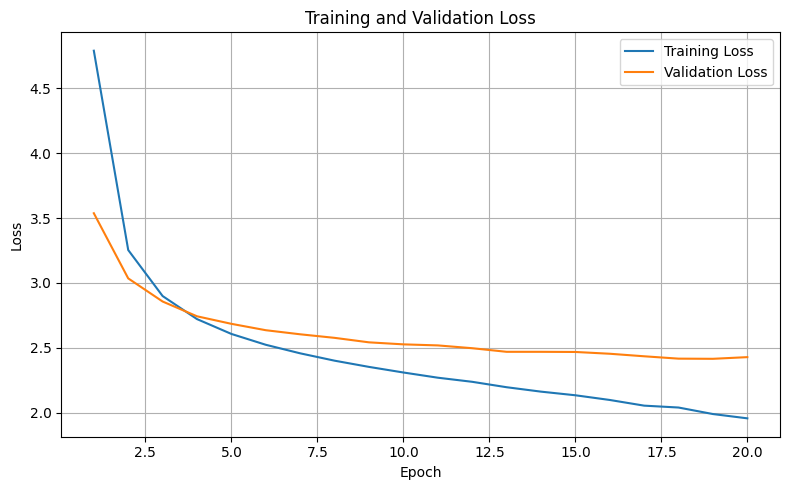

In [ ]:
import matplotlib.pyplot as plt

# Loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


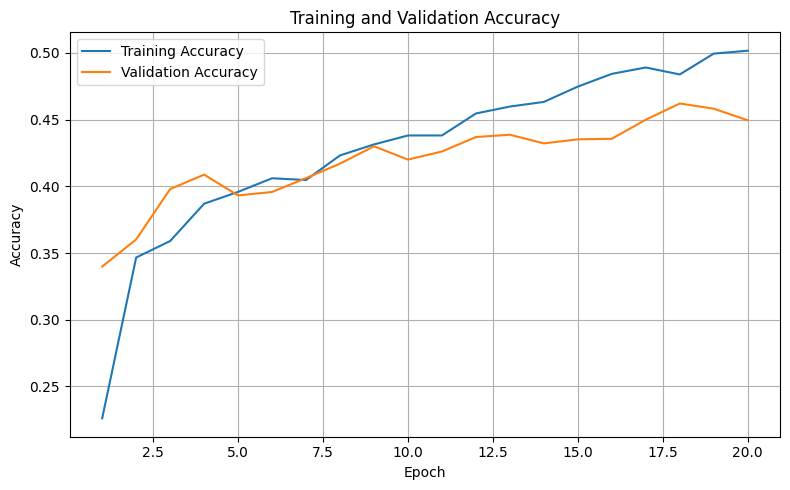

In [ ]:
# Accuracy values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## After tuning the best model - above model

In [ ]:
# 🔹 Define Optimized Model
input_dim = X.shape[1]
model = Sequential([
    Input(shape=(input_dim,)),
    Dense(1024, activation='relu'),
    Dropout(0.4),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Adjusted number of classes
])

# 🔹 Compile model with label smoothing
loss_fn = CategoricalCrossentropy(label_smoothing=0.1)
optimizer = Adam(learning_rate=5e-5)

model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback
'''early_stop = EarlyStopping(
    monitor='val_accuracy',       # You can also use 'val_loss'
    patience=4,                   # Stop if no improvement after 5 epochs
    restore_best_weights=True,   # Bring back best weights
    verbose=1
)'''

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, verbose=1) #, callbacks=early_stop)

# 📌 Save Model
#model.save('/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Imbalanced dataset/augmented process/vqa_model_with_minilm_bert.h5')

# 🔍 Evaluate Model on Test Set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/25
145/145 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.1196 - loss: 5.7516 - val_accuracy: 0.3377 - val_loss: 3.9628
Epoch 2/25
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3289 - loss: 3.8822 - val_accuracy: 0.3446 - val_loss: 3.6166
Epoch 3/25
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3400 - loss: 3.6397 - val_accuracy: 0.3242 - val_loss: 3.5318
Epoch 4/25
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3545 - loss: 3.4936 - val_accuracy: 0.3559 - val_loss: 3.4553
Epoch 5/25
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3581 - loss: 3.4306 - val_accuracy: 0.3706 - val_loss: 3.3916
Epoch 6/25
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3756 - loss: 3.3526 - val_accuracy: 0.3758 - val_loss: 3.3399
Epoch 7/25
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3945 - loss: 3.2557 - val_accuracy: 0.3836 - val_loss: 3.3016
Epoch 8/25
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4010 - loss: 3.2622 - val_accuracy: 

**Prediction**

In [ ]:
# Keep track of indices to map back to df
all_indices = np.arange(len(X))
train_idx, temp_idx = train_test_split(all_indices, test_size=0.4, random_state=42)
val_idx, test_idx = train_test_split(temp_idx, test_size=0.25, random_state=42)

# Use these to split data
X_train, X_val, X_test = X[train_idx], X[val_idx], X[test_idx]
y_train, y_val, y_test = y[train_idx], y[val_idx], y[test_idx]

y_pred_probs = model.predict(X_test)
y_pred_indices = np.argmax(y_pred_probs, axis=1)
y_actual_indices = np.argmax(y_test, axis=1)

predicted_answers = label_encoder.inverse_transform(y_pred_indices)
actual_answers = label_encoder.inverse_transform(y_actual_indices)

comparison_data = []

for i, original_idx in enumerate(test_idx):
    image_id = df.iloc[original_idx]['image_id']
    question_id = df.iloc[original_idx]['question_id']
    actual = actual_answers[i]
    predicted = predicted_answers[i]
    comparison_data.append((image_id, question_id, actual, predicted))

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data, columns=['image_id', 'question_id', 'actual_answer', 'predicted_answer'])

# Preview
print(comparison_df.head(10))

# Calculate accuracy manually
correct_predictions = (comparison_df['actual_answer'] == comparison_df['predicted_answer']).sum()
total_predictions = len(comparison_df)
accuracy_percentage = (correct_predictions / total_predictions) * 100

print(f"Manual Test Accuracy: {accuracy_percentage:.2f}%")


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
   image_id  question_id actual_answer predicted_answer
0      1678        16783             2                2
1        27          270           yes              yes
2      1871        18710             3                2
3      1391        13910            no              yes
4      1952        19523             1                1
5       912         9123             2                2
6      1891        18913             1                1
7       612         6122      sidewalk           soccer
8       431         4310          bees              yes
9      1114        11142           yes              yes
Manual Test Accuracy: 48.37%


**Answer type vs. Accuracy**

In [ ]:
# Step 1: Classify actual answer types
def classify_answer_type(answer):
    answer = str(answer).strip().lower()
    if answer in ['yes', 'no']:
        return 'yes/no'
    elif answer.replace(" ", "").isnumeric():
        return 'number'
    else:
        return 'other'

comparison_df['answer_type'] = comparison_df['actual_answer'].apply(classify_answer_type)

# Step 2: Identify correct predictions
comparison_df['is_correct'] = comparison_df['actual_answer'] == comparison_df['predicted_answer']

# Step 3: For each type, count correct / total
type_summary = comparison_df.groupby('answer_type').agg(
    total=('answer_type', 'count'),
    correct=('is_correct', 'sum')
)
type_summary['accuracy (%)'] = (type_summary['correct'] / type_summary['total']) * 100
type_summary = type_summary.reset_index()

# Step 4: Display
print("📊 Type-specific accuracy (out of total 768 test samples):")
print(type_summary)


📊 Type-specific accuracy (out of total 768 test samples):
  answer_type  total  correct  accuracy (%)
0      number    259      175     67.567568
1       other    251       31     12.350598
2      yes/no    259      166     64.092664


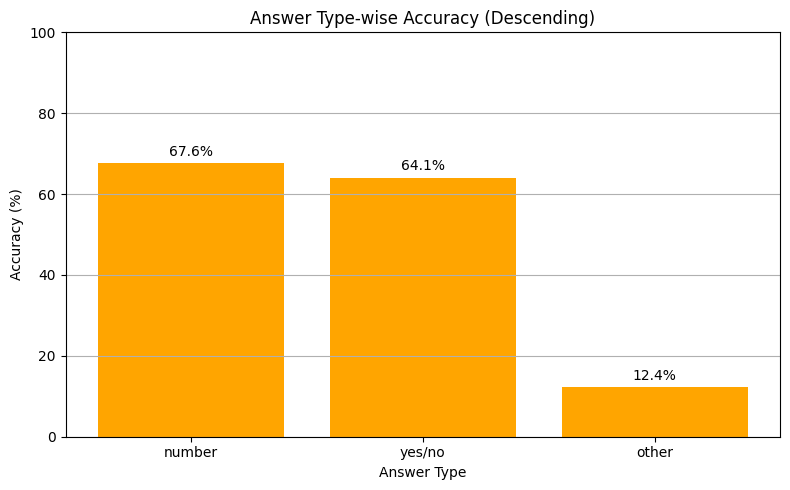

In [ ]:
# Assuming type_summary is already defined
type_summary_sorted = type_summary.sort_values(by='accuracy (%)', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(type_summary_sorted['answer_type'], type_summary_sorted['accuracy (%)'], color='orange')
plt.title('Answer Type-wise Accuracy (Descending)')
plt.xlabel('Answer Type')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(axis='y')

# Annotate bars with percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Confusion matrix**

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Manual Test Accuracy: 48.37%


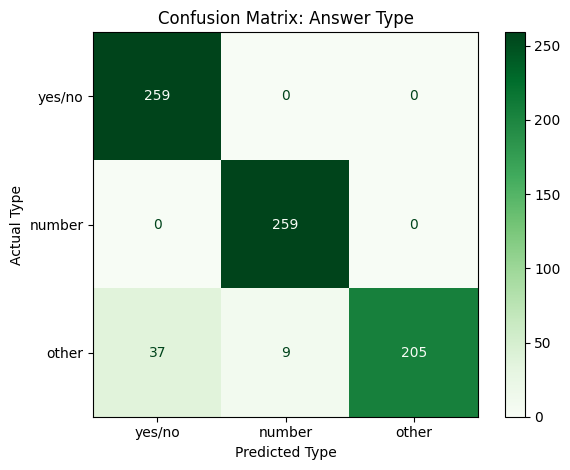

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 🔹 Keep track of indices to map back to df
all_indices = np.arange(len(X))
train_idx, temp_idx = train_test_split(all_indices, test_size=0.4, random_state=42)
val_idx, test_idx = train_test_split(temp_idx, test_size=0.25, random_state=42)

# 🔹 Use these to split data
X_train, X_val, X_test = X[train_idx], X[val_idx], X[test_idx]
y_train, y_val, y_test = y[train_idx], y[val_idx], y[test_idx]

# 🔹 Predict on test set
y_pred_probs = model.predict(X_test)
y_pred_indices = np.argmax(y_pred_probs, axis=1)
y_actual_indices = np.argmax(y_test, axis=1)

# 🔹 Decode predictions and actuals
predicted_answers = label_encoder.inverse_transform(y_pred_indices)
actual_answers = label_encoder.inverse_transform(y_actual_indices)

# 🔹 Build comparison DataFrame
comparison_data = []
for i, original_idx in enumerate(test_idx):
    image_id = df.iloc[original_idx]['image_id']
    question_id = df.iloc[original_idx]['question_id']
    actual = actual_answers[i]
    predicted = predicted_answers[i]
    comparison_data.append((image_id, question_id, actual, predicted))

comparison_df = pd.DataFrame(comparison_data, columns=['image_id', 'question_id', 'actual_answer', 'predicted_answer'])

# ✅ Manual accuracy
correct_predictions = (comparison_df['actual_answer'] == comparison_df['predicted_answer']).sum()
total_predictions = len(comparison_df)
accuracy_percentage = (correct_predictions / total_predictions) * 100
print(f"Manual Test Accuracy: {accuracy_percentage:.2f}%")

# 🔍 Classify answers into types
def classify_answer_type(answer):
    answer = str(answer).strip().lower()
    if answer in ['yes', 'no']:
        return 'yes/no'
    elif answer.replace(" ", "").isnumeric():
        return 'number'
    else:
        return 'other'

comparison_df['actual_type'] = comparison_df['actual_answer'].apply(classify_answer_type)
comparison_df['predicted_type'] = comparison_df['predicted_answer'].apply(classify_answer_type)

# 🔹 Confusion Matrix by Answer Type
type_labels = ['yes/no', 'number', 'other']
y_true_type = comparison_df['actual_type']
y_pred_type = comparison_df['predicted_type']

cm_type = confusion_matrix(y_true_type, y_pred_type, labels=type_labels)

# 🔹 Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_type, display_labels=type_labels)
disp.plot(cmap='Greens')
plt.title('Confusion Matrix: Answer Type')
plt.xlabel('Predicted Type')
plt.ylabel('Actual Type')
plt.tight_layout()
plt.show()


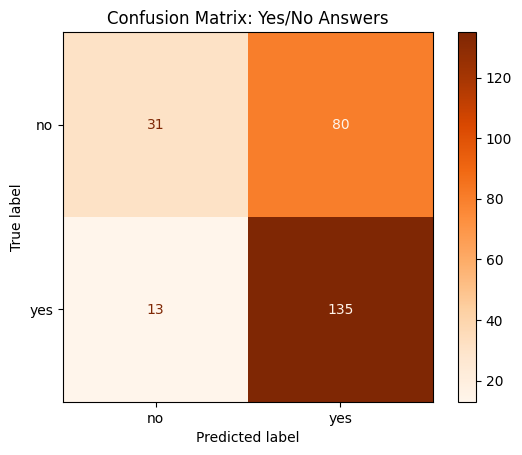

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Filter only yes/no cases
yesno_df = comparison_df[
    comparison_df['actual_answer'].isin(['yes', 'no']) &
    comparison_df['predicted_answer'].isin(['yes', 'no'])
].copy()

# Convert to binary: 'yes' = 1, 'no' = 0
y_true_binary = (yesno_df['actual_answer'] == 'yes').astype(int)
y_pred_binary = (yesno_df['predicted_answer'] == 'yes').astype(int)

# Create confusion matrix
cm = confusion_matrix(y_true_binary, y_pred_binary)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes'])
disp.plot(cmap='Oranges')
plt.title("Confusion Matrix: Yes/No Answers")
plt.show()


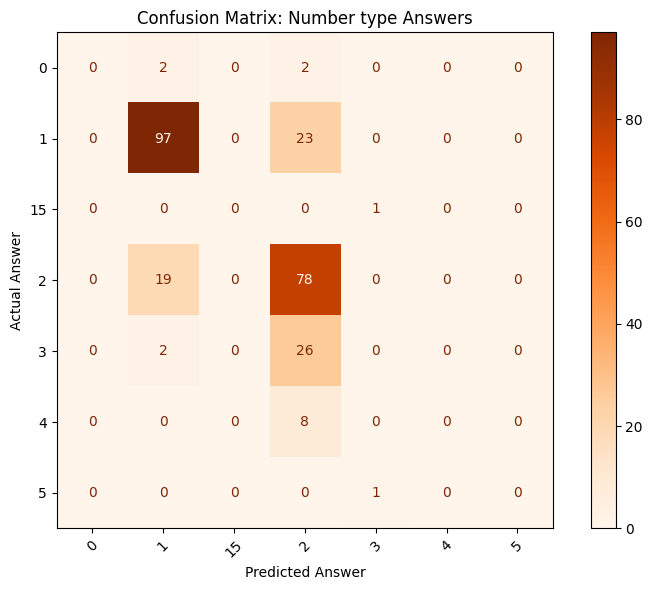

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Function to detect number-type answers
def is_number(s):
    return str(s).strip().replace(" ", "").isnumeric()

# Filter number-type answers (both actual and predicted must be numbers)
number_df = comparison_df[
    comparison_df['actual_answer'].apply(is_number) &
    comparison_df['predicted_answer'].apply(is_number)
].copy()

# Get unique number labels (sorted for consistency)
number_labels = sorted(list(set(number_df['actual_answer']) | set(number_df['predicted_answer'])))

# Build confusion matrix
y_true_number = number_df['actual_answer']
y_pred_number = number_df['predicted_answer']
cm_number = confusion_matrix(y_true_number, y_pred_number, labels=number_labels)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm_number, display_labels=number_labels)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Oranges', ax=ax, xticks_rotation=45)
plt.title("Confusion Matrix: Number type Answers")
plt.xlabel("Predicted Answer")
plt.ylabel("Actual Answer")
plt.tight_layout()
plt.show()


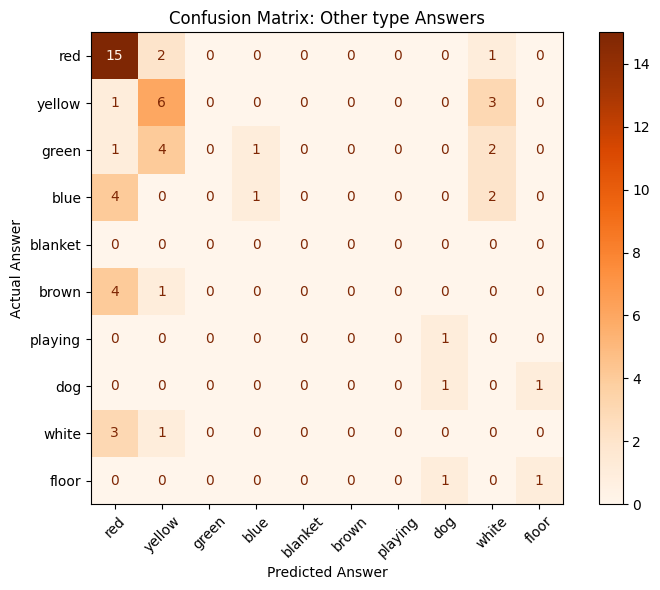

In [ ]:
# Filter "other" answers
other_df = comparison_df[
    ~comparison_df['actual_answer'].isin(['yes', 'no']) &
    ~comparison_df['actual_answer'].apply(is_number) &
    ~comparison_df['predicted_answer'].isin(['yes', 'no']) &
    ~comparison_df['predicted_answer'].apply(is_number)
].copy()

# Get most common labels (limit to top N to keep matrix readable)
top_n = 10
top_labels = other_df['actual_answer'].value_counts().head(top_n).index.tolist()

# Filter to top N only (both actual and predicted must be in top labels)
filtered_other_df = other_df[
    (other_df['actual_answer'].isin(top_labels)) &
    (other_df['predicted_answer'].isin(top_labels))
]

# Build confusion matrix
y_true_other = filtered_other_df['actual_answer']
y_pred_other = filtered_other_df['predicted_answer']
cm_other = confusion_matrix(y_true_other, y_pred_other, labels=top_labels)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm_other, display_labels=top_labels)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Oranges', ax=ax, xticks_rotation=45)
plt.title("Confusion Matrix: Other type Answers")
plt.xlabel("Predicted Answer")
plt.ylabel("Actual Answer")
plt.tight_layout()
plt.show()


**Accuracy and Loss vs. Epoch**

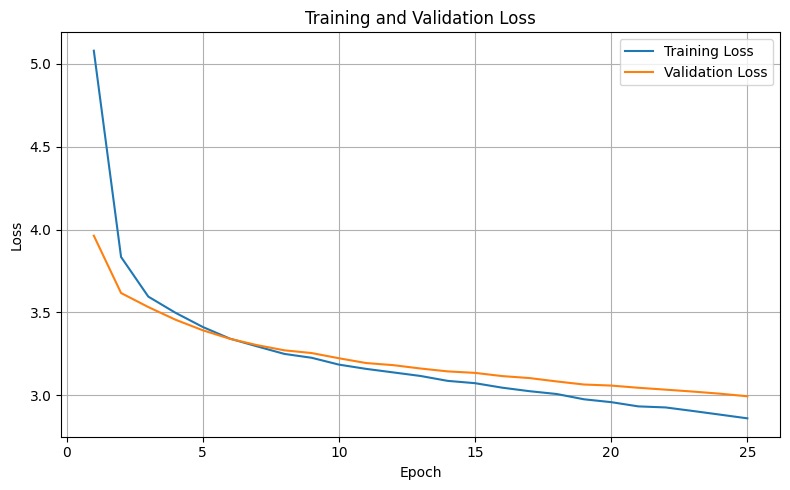

In [ ]:
import matplotlib.pyplot as plt

# Loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


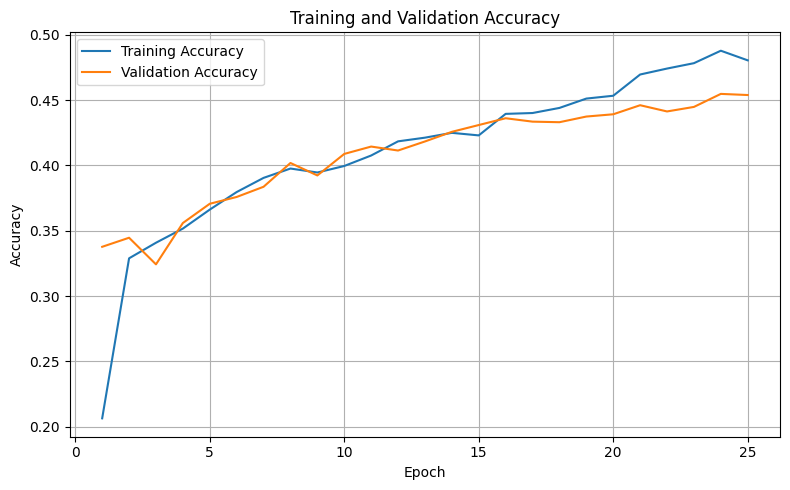

In [ ]:
# Accuracy values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Final_Input_Files/tuned_vqa_model.h5')


** Model Summary**

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
tuned_model = load_model('/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Final_Input_Files/tuned_vqa_model.h5')

# Print model summary
tuned_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 1024)                │       3,933,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 657)                 │          84,753 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,706,967 (17.96 MB)

 Trainable params: 4,706,961 (17.96 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6 (36.00 B)

## Model 2: Accuracy is 37% without captions

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import h5py
import gc

# Enable mixed precision for optimized memory usage
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

# 📌 Load Image Features Using Memory Mapping (Efficient for Large Datasets)
image_features = np.load('/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/VQA feature extraction/image_features_2000.npy', mmap_mode='r')
image_ids = np.load('/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/VQA feature extraction/image_ids_2000.npy', mmap_mode='r')

# Normalize Image Features (Min-Max Scaling)
image_features = (image_features - np.min(image_features)) / (np.max(image_features) - np.min(image_features))

# 📌 Load Question Embeddings and IDs
with h5py.File('/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Imbalanced dataset/augmented process/balanced_questionembeddings_ids.h5', 'r') as hf:
    question_features = np.array(hf['embeddings'])
    question_image_ids = np.array(hf['image_ids'])
    question_ids = np.array(hf['question_ids'])

# Normalize Question Features (Z-score Normalization)
question_features = (question_features - np.mean(question_features)) / np.std(question_features)

# 📌 Load YOLO Extracted Features (Precomputed)
with h5py.File('/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Imbalanced dataset/augmented process/yolo_question_features.h5', 'r') as hf:
    yolo_features = np.array(hf['image_features'])
    yolo_image_ids = np.array(hf['image_ids'])
    yolo_question_ids = np.array(hf['question_ids'])

# Normalize YOLO Features (Min-Max Scaling)
yolo_features = (yolo_features - np.min(yolo_features)) / (np.max(yolo_features) - np.min(yolo_features))

# 📌 Load CSV containing Questions & Answers
df = pd.read_csv('/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Imbalanced dataset/augmented process/balanced_dataset.csv', low_memory=False)

# 🔹 Encode multiple-choice answers to numerical labels
label_encoder = LabelEncoder()
df['answer_index'] = label_encoder.fit_transform(df['multiple_choice_answer'])
y = to_categorical(df['answer_index'], num_classes=len(label_encoder.classes_))  # One-hot encoding

# 🔹 Extract multiple-choice options
df['multiple_choices'] = df['multiple_choices'].apply(lambda x: eval(x))  # Convert string list to Python list
multiple_choices = np.array(df['multiple_choices'].tolist())  # Shape: (num_samples, 18)

# 📌 Create Efficient Mappings for Feature Retrieval
image_id_to_index = {image_ids[i]: i for i in range(len(image_ids))}
question_id_to_index = {(question_image_ids[i], question_ids[i]): i for i in range(len(question_ids))}
yolo_id_to_index = {(yolo_image_ids[i], yolo_question_ids[i]): i for i in range(len(yolo_question_ids))}

# 🔹 Retrieve Image Features
image_feature_vectors = np.array([
    image_features[image_id_to_index[i]] if i in image_id_to_index else np.zeros(image_features.shape[1], dtype=np.float32)
    for i in df['image_id']
], dtype=np.float32)

# 🔹 Retrieve YOLO Features (Object Detection Features)
yolo_feature_vectors = np.array([
    yolo_features[yolo_id_to_index[(df.iloc[i]['image_id'], df.iloc[i]['question_id'])]]
    if (df.iloc[i]['image_id'], df.iloc[i]['question_id']) in yolo_id_to_index
    else np.zeros(yolo_features.shape[1], dtype=np.float32)  # Default Vector if not found
    for i in range(len(df))
], dtype=np.float32)

# 🔹 Retrieve Question Embeddings
question_feature_vectors = np.array([
    question_features[question_id_to_index[(df.iloc[i]['image_id'], df.iloc[i]['question_id'])]]
    if (df.iloc[i]['image_id'], df.iloc[i]['question_id']) in question_id_to_index
    else np.zeros(question_features.shape[1], dtype=np.float32)  # Default Vector if not found
    for i in range(len(df))
], dtype=np.float32)

# ✅ Concatenate Image, YOLO, and Question Features
X = np.hstack((image_feature_vectors, yolo_feature_vectors, question_feature_vectors)).astype(np.float32)

# 📌 Train-Validation-Test Split
X_train, X_temp, y_train, y_temp, choices_train, choices_temp = train_test_split(
    X, y, multiple_choices, test_size=0.4, random_state=42)  # 60% Train, 40% Temp
X_val, X_test, y_val, y_test, choices_val, choices_test = train_test_split(
    X_temp, y_temp, choices_temp, test_size=0.25, random_state=42)  # 30% Val, 10% Test

# 🔹 Define Optimized Model
input_dim = X.shape[1]
model = Sequential([
    Input(shape=(input_dim,)),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Adjusted number of classes
])

# 🔹 Compile Model
model.compile(optimizer=Adam(learning_rate=5e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# 📌 Free Memory
gc.collect()

# 📌 Create TensorFlow Dataset for Large Data Handling
batch_size = 1024  # Increase batch size dynamically based on GPU
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# 🔥 Train Model Using Efficient Data Pipeline
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    verbose=1
)

# 📌 Save Model
model.save('/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/Imbalanced dataset/augmented process/vqa_modelbalance.h5')

# 🔍 Evaluate Model on Test Set
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 7.3195e-04 - loss: 6.4990 - val_accuracy: 8.6693e-04 - val_loss: 6.4112
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.0034 - loss: 6.4024 - val_accuracy: 0.1404 - val_loss: 6.2996
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.0412 - loss: 6.2910 - val_accuracy: 0.3052 - val_loss: 6.1679
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.1260 - loss: 6.1572 - val_accuracy: 0.3177 - val_loss: 6.0080
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2015 - loss: 6.0021 - val_accuracy: 0.3177 - val_loss: 5.8575
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2366 - loss: 5.8580 - val_accuracy: 0.3169 - val_loss: 5.6360
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2554 - loss: 5.6422 - val_accuracy: 0.3164 - val_loss: 5.3755
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2554 - loss: 5.3978 - val_accuracy: 0.3164 - val_loss: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step - accuracy: 0.3706 - loss: 3.0465
Test Accuracy: 37.06%


**Prediction**

In [ ]:
# Keep track of indices to map back to df
all_indices = np.arange(len(X))
train_idx, temp_idx = train_test_split(all_indices, test_size=0.4, random_state=42)
val_idx, test_idx = train_test_split(temp_idx, test_size=0.25, random_state=42)

# Use these to split data
X_train, X_val, X_test = X[train_idx], X[val_idx], X[test_idx]
y_train, y_val, y_test = y[train_idx], y[val_idx], y[test_idx]

y_pred_probs = model.predict(X_test)
y_pred_indices = np.argmax(y_pred_probs, axis=1)
y_actual_indices = np.argmax(y_test, axis=1)

predicted_answers = label_encoder.inverse_transform(y_pred_indices)
actual_answers = label_encoder.inverse_transform(y_actual_indices)

comparison_data = []

for i, original_idx in enumerate(test_idx):
    image_id = df.iloc[original_idx]['image_id']
    question_id = df.iloc[original_idx]['question_id']
    actual = actual_answers[i]
    predicted = predicted_answers[i]
    comparison_data.append((image_id, question_id, actual, predicted))

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data, columns=['image_id', 'question_id', 'actual_answer', 'predicted_answer'])

# Preview
print(comparison_df.head())

# Calculate accuracy manually
correct_predictions = (comparison_df['actual_answer'] == comparison_df['predicted_answer']).sum()
total_predictions = len(comparison_df)
accuracy_percentage = (correct_predictions / total_predictions) * 100

print(f"Manual Test Accuracy: {accuracy_percentage:.2f}%")


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
   image_id  question_id actual_answer predicted_answer
0      1678        16783             2                1
1        27          270           yes              yes
2      1871        18710             3                2
3      1391        13910            no              yes
4      1952        19523             1                1
Manual Test Accuracy: 37.06%


**Confusion Matrix**

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Manual Test Accuracy: 37.06%


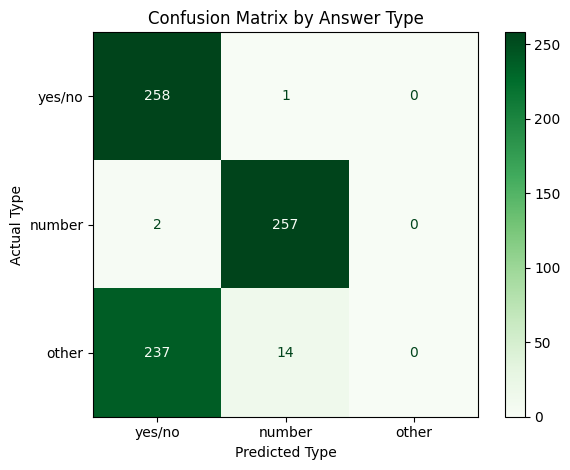

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 🔹 Keep track of indices to map back to df
all_indices = np.arange(len(X))
train_idx, temp_idx = train_test_split(all_indices, test_size=0.4, random_state=42)
val_idx, test_idx = train_test_split(temp_idx, test_size=0.25, random_state=42)

# 🔹 Use these to split data
X_train, X_val, X_test = X[train_idx], X[val_idx], X[test_idx]
y_train, y_val, y_test = y[train_idx], y[val_idx], y[test_idx]

# 🔹 Predict on test set
y_pred_probs = model.predict(X_test)
y_pred_indices = np.argmax(y_pred_probs, axis=1)
y_actual_indices = np.argmax(y_test, axis=1)

# 🔹 Decode predictions and actuals
predicted_answers = label_encoder.inverse_transform(y_pred_indices)
actual_answers = label_encoder.inverse_transform(y_actual_indices)

# 🔹 Build comparison DataFrame
comparison_data = []
for i, original_idx in enumerate(test_idx):
    image_id = df.iloc[original_idx]['image_id']
    question_id = df.iloc[original_idx]['question_id']
    actual = actual_answers[i]
    predicted = predicted_answers[i]
    comparison_data.append((image_id, question_id, actual, predicted))

comparison_df = pd.DataFrame(comparison_data, columns=['image_id', 'question_id', 'actual_answer', 'predicted_answer'])

# ✅ Manual accuracy
correct_predictions = (comparison_df['actual_answer'] == comparison_df['predicted_answer']).sum()
total_predictions = len(comparison_df)
accuracy_percentage = (correct_predictions / total_predictions) * 100
print(f"Manual Test Accuracy: {accuracy_percentage:.2f}%")

# 🔍 Classify answers into types
def classify_answer_type(answer):
    answer = str(answer).strip().lower()
    if answer in ['yes', 'no']:
        return 'yes/no'
    elif answer.replace(" ", "").isnumeric():
        return 'number'
    else:
        return 'other'

comparison_df['actual_type'] = comparison_df['actual_answer'].apply(classify_answer_type)
comparison_df['predicted_type'] = comparison_df['predicted_answer'].apply(classify_answer_type)

# 🔹 Confusion Matrix by Answer Type
type_labels = ['yes/no', 'number', 'other']
y_true_type = comparison_df['actual_type']
y_pred_type = comparison_df['predicted_type']

cm_type = confusion_matrix(y_true_type, y_pred_type, labels=type_labels)

# 🔹 Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_type, display_labels=type_labels)
disp.plot(cmap='Greens')
plt.title('Confusion Matrix by Answer Type')
plt.xlabel('Predicted Type')
plt.ylabel('Actual Type')
plt.tight_layout()
plt.show()


# Model Accuracy: 23.72% for 20000 images without caption and dataset imbalance

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import h5py
import gc

# ✅ Enable mixed precision
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

# Load Image Features Using Memory Mapping (Efficient for Large Datasets)
image_features = np.load('/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/VQA feature extraction/image_features.npy', mmap_mode='r')
image_ids = np.load('/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/VQA feature extraction/image_ids.npy', mmap_mode='r')
# ✅ Load Question Embeddings
with h5py.File('/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/VQA feature extraction/minilm_questionembeddings_ids.h5', 'r') as hf:
    question_features = np.array(hf['embeddings'])
    question_image_ids = np.array(hf['image_ids'])
    question_ids = np.array(hf['question_ids'])

# ✅ Load YOLO Features (20000)
with h5py.File('/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/VQA feature extraction/yolo_question_features_20000.h5', 'r') as hf:
    yolo_features = np.array(hf['yolo_features'])
    yolo_image_ids = np.array(hf['image_ids'])
    yolo_question_ids = np.array(hf['question_ids'])

# ✅ Load Textual QnA CSV
df = pd.read_csv('/content/drive/MyDrive/Deep Learning Project DS80013/Potential Final 7 papers/Code/VQA feature extraction/TextualProcessed_QnA_Train.csv', low_memory=False)

# ✅ Encode Answers
label_encoder = LabelEncoder()
df['answer_index'] = label_encoder.fit_transform(df['multiple_choice_answer'])
y = to_categorical(df['answer_index'], num_classes=len(label_encoder.classes_))
df['multiple_choices'] = df['multiple_choices'].apply(lambda x: eval(x))
multiple_choices = np.array(df['multiple_choices'].tolist())

# ✅ Create Index Mappings
image_id_to_index = {image_ids[i]: i for i in range(len(image_ids))}
question_id_to_index = {(question_image_ids[i], question_ids[i]): i for i in range(len(question_ids))}
yolo_id_to_index = {(yolo_image_ids[i], yolo_question_ids[i]): i for i in range(len(yolo_question_ids))}

# ✅ Extract Features
image_feature_vectors = np.array([
    image_features[image_id_to_index[i]] if i in image_id_to_index else np.zeros(image_features.shape[1], dtype=np.float16)
    for i in df['image_id']
], dtype=np.float16)

question_feature_vectors = np.array([
    question_features[question_id_to_index[(df.iloc[i]['image_id'], df.iloc[i]['question_id'])]]
    if (df.iloc[i]['image_id'], df.iloc[i]['question_id']) in question_id_to_index
    else np.zeros(question_features.shape[1], dtype=np.float16)
    for i in range(len(df))
], dtype=np.float16)

yolo_feature_vectors = np.array([
    yolo_features[yolo_id_to_index[(df.iloc[i]['image_id'], df.iloc[i]['question_id'])]]
    if (df.iloc[i]['image_id'], df.iloc[i]['question_id']) in yolo_id_to_index
    else np.zeros(yolo_features.shape[1], dtype=np.float16)
    for i in range(len(df))
], dtype=np.float16)

# ✅ Combine Features
X = np.hstack((image_feature_vectors, yolo_feature_vectors, question_feature_vectors)).astype(np.float16)

# ✅ Train-Val-Test Split (60-30-10)
X_train, X_temp, y_train, y_temp, choices_train, choices_temp = train_test_split(
    X, y, multiple_choices, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test, choices_val, choices_test = train_test_split(
    X_temp, y_temp, choices_temp, test_size=0.25, random_state=42)

# ✅ Define Model
input_dim = X.shape[1]
model = Sequential([
    Input(shape=(input_dim,)),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# ✅ Compile & Train
model.compile(optimizer=Adam(learning_rate=5e-5), loss='categorical_crossentropy', metrics=['accuracy'])
gc.collect()
batch_size = 1024
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# ✅ Train
history = model.fit(train_dataset, validation_data=val_dataset, epochs=20, verbose=1)

# ✅ Save Model
model.save('/content/drive/MyDrive/DLcodes/VQA feature extraction/vqa_model2_NO_OBJECTCSV_YOLO20000.h5')

# ✅ Evaluate
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 35s 796ms/step - accuracy: 0.0133 - loss: 15.3415 - val_accuracy: 0.2387 - val_loss: 7.6254
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 29s 807ms/step - accuracy: 0.0715 - loss: 8.6218 - val_accuracy: 0.1772 - val_loss: 5.8335
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 22s 610ms/step - accuracy: 0.1991 - loss: 5.9835 - val_accuracy: 0.1970 - val_loss: 5.0314
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 499ms/step - accuracy: 0.2049 - loss: 5.2584 - val_accuracy: 0.2215 - val_loss: 4.6192
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 516ms/step - accuracy: 0.2022 - loss: 4.8437 - val_accuracy: 0.1756 - val_loss: 4.4473
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 22s 565ms/step - accuracy: 0.2066 - loss: 4.6338 - val_accuracy: 0.1868 - val_loss: 4.3498
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 545ms/step - accuracy: 0.2059 - loss: 4.5174 - val_accuracy: 0.2196 - val_loss: 4.2962
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 503ms/step - accuracy: 0.2096 - loss: 4.4421 - val_acc

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 266ms/step - accuracy: 0.2322 - loss: 4.2353
Test Accuracy: 23.72%
